In [1065]:
import string
import pandas as pd
import pickle
from pprint import pprint 
import nltk
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer 
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import tokenize,simple_tokenize
from gensim import corpora
from gensim.models import TfidfModel
from gensim.test.utils import get_tmpfile
# Enable logging for gensim - optional
import logging
import os
from gensim.models.wrappers import LdaMallet
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.utils import shuffle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from scipy.spatial.distance import euclidean,cosine

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import textwrap
from difflib import SequenceMatcher
from copy import deepcopy
from random import randint
import random
import numpy
from matplotlib import pyplot
import math
from IPython.display import display, HTML
import pandas as pd
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

# Load vectors

In [362]:
#save_tfidf_doc_vecs_dict_path = "./doc_vecs_dicts/tfidf_doc_vecs_dict.pickle"
load_lda_doc_vecs_dict_path = "../doc_vecs_dicts/lda_doc_vecs_dict.pickle"
load_doc2vec_doc_vecs_dict_path = "../doc_vecs_dicts/doc2vec_doc_vecs_dict.pickle"

load_lda_jts_avg_vecs_dict_path = "../doc_vecs_dicts/lda_jts_avg_vecs_dict.pickle"
load_doc2vec_jts_avg_vecs_dict_path = "../doc_vecs_dicts/doc2vec_jts_avg_vecs_dict.pickle"

load_lda_skills_vecs_dict_path = "../doc_vecs_dicts/lda_skills_vecs_dict.pickle"
load_doc2vec_skills_vecs_dict_path = "../doc_vecs_dicts/doc2vec_skills_vecs_dict.pickle"

load_avg_skills_years_dict_path = '../avg_skills_years_dict/avg_skills_years_dict.pickle'

with open(load_lda_doc_vecs_dict_path, 'rb') as f:
    lda_doc_vecs_dict = pickle.load(f)
with open(load_doc2vec_doc_vecs_dict_path, 'rb') as f:
    doc2vec_doc_vecs_dict = pickle.load(f)
print ("doc vec loaded!")

with open(load_lda_jts_avg_vecs_dict_path, 'rb') as f:
    lda_jts_avg_vecs_dict = pickle.load(f)
with open(load_doc2vec_jts_avg_vecs_dict_path, 'rb') as f:
    doc2vec_jts_avg_vecs_dict = pickle.load(f)
print ("jt vec loaded!")
    
with open(load_lda_skills_vecs_dict_path, 'rb') as f:
    lda_skills_vecs_dict = pickle.load(f)
with open(load_doc2vec_skills_vecs_dict_path, 'rb') as f:
    doc2vec_skills_vecs_dict = pickle.load(f)
print ("skills vec loaded!")


with open(load_avg_skills_years_dict_path, 'rb') as f:
    avg_skills_years_dict = pickle.load(f)
print ("avg_skills_years_dict loaded!")

doc vec loaded!
jt vec loaded!
skills vec loaded!
avg_skills_years_dict loaded!


In [137]:
load_shuf_del_tok_bi_stp_traintest_cvjd_dict_path = '../tokenized_corpus/shuf_del_tok_bi_stp_traintest_cvjd_dict.pickle'
load_shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict_path = '../tokenized_corpus/shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict.pickle'

with open(load_shuf_del_tok_bi_stp_traintest_cvjd_dict_path,"rb") as f:
    shuf_del_tok_bi_stp_traintest_cvjd_dict = pickle.load(f)
with open(load_shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict_path,"rb") as f:
    shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict = pickle.load(f)


In [136]:
load_doc2vecModel_path = '../doc2vecModels/traintest_bi_rmcm'
doc2vecModel = Doc2Vec.load(load_doc2vecModel_path)

# Get random 100 CVs 100 JDs

In [465]:
cvX_cnt = 0
data_cnt = 0
test_cvX_dict = {}
for key in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
    if (data_cnt>=100):
        break
    else:
        cvX_cnt = randint(0, 42739)
        cvX_key = 'cvX_' + str(cvX_cnt)
        if(not jdX_key in test_cvX_dict):
            data = shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvX_key]
            if data[2] != [] and data[0]!=None:
                print (cvX_key, data[0])
                data_cnt += 1
                test_cvX_dict[cvX_key] = data


cvX_26787 Senior Oracle Database Administrator
cvX_447 Temporary Staff - Outbound Associate/Assistant Manager/Problem Solver
cvX_23245 Incident Coordinator II
cvX_18879 Technical lead/ system Engineer
cvX_27830 Software Development Intern
cvX_30093 Mission Team Coordinator (Volunteer)
cvX_3886 Application Development Intern
cvX_39372 Test Engineer
cvX_37363 Sr. FullStack.Net Developer
cvX_29186 Network Manager
cvX_27496 Director, Supply Chain Strategy and Operations Excellence
cvX_5094 Problem Manager - MCNOSC
cvX_29989 GRAPHIC DESIGN INTERN
cvX_21090 Database Administrator
cvX_11999 UI UX Web Designer Developer
cvX_7399 Material Management Business System Transformation
cvX_23008 Senior Sharepoint Consultant / .Net Developer
cvX_42532 Business Owner
cvX_7141 J2EE/WebSphere Developer
cvX_36150 Trainer/IT Project Coordinator - E.D.I.T. Electronic Data Interface
cvX_14053 Junior UI Developer
cvX_16136 Global Information Technology Manager
cvX_22241 QA Lead
cvX_1210 Chief Information Secu

In [1030]:
from random import randint

jd_cnt = 0
data_cnt = 0
test_jd_dict = {}
for key in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
    if (data_cnt>=100):
        break
    else:
        jd_cnt = randint(0, 21727)
        jdX_key = 'jdX_' + str(jd_cnt)
        if(not jdX_key in test_jd_dict):
            try:
                data = shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[jdX_key]
                if data[0] != None:
                    print (jdX_key,data[0])
                    data_cnt += 1
                    test_jd_dict[jdX_key] = data
            except:
                pass
        jd_cnt += 1


jdX_10779 Multimedia Designer | SAIC
jdX_9953 Web Solutions Engineer, Partnerships | Google
jdX_4339 Network Specialist | Leidos
jdX_134 Software Development Engineer - Onsite Publishing Team | Amazon.com Services, Inc.
jdX_10222 Software Systems Engineer - Pinpoint | SAIC
jdX_3296 Customer Success Strategy, Intelligent Cloud WW Director, Digital Transformation | Microsoft
jdX_15042 Professional-Advertising Production Support | AT&T
jdX_3262 Internship opportunities for Ph.D. students: Software Engineer – Computer Vision | Microsoft
jdX_21721 MS Implementation Specialist | NCR
jdX_11752 Siri - Software Engineer | Apple
jdX_9887 Account Manager, Evolve Vertical | Google
jdX_15069 IT Service Delivery Rep Junior (Government) Bangor | AT&T
jdX_7195 Princ Administrator, Systems | General Dynamics Information Technology
jdX_2087 Watson Health - Content Strategist | IBM
jdX_15045 Principal System Engineer APIs & MicroServices | AT&T
jdX_14884 AT&T Design Technology Team Careers | AT&T
jdX_114

# Util Func

In [54]:
def get_eu_dist(vec_a,vec_b):
    return euclidean(vec_a,vec_b)

In [55]:
def get_cos_sim(vec_a,vec_b):
    return 1 - cosine(vec_a, vec_b)

In [129]:
def validate_wv(doc2vecModel,token):
    try:
        a = doc2vecModel.wv[token]
        return True
    except:
        return False

In [56]:
def find_nearest_cvs(kdtree,idx2key,x,k):
    [dist], [idxs] = kdtree.query([x],k=k)
    for idx in idxs:
        #print (idx)
        key = idx2key[idx]
        if key.startswith('cvX'): 
            print (key)
            print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key][0])
            print ("\n---------------\n")
            print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key][3])
            print ("\n---------------\n")
            print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key][2])
            print ("\n--------------------------------------------------------------------------------------------------\n")

In [57]:
def find_nearest_jds(kdtree,idx2key,x,k):
    [dist], [idxs] = kdtree.query([x],k=k)
    for idx in idxs:
        key = idx2key[idx]
        if key.startswith('jd'):
            print (key)
            print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key][0])
            print ("\n---------------\n")
            print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key][3])
            print ("\n---------------\n")
            print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key][2])
            print ("\n--------------------------------------------------------------------------------------------------\n")

In [262]:
def getHtml(df):
    return HTML(df.to_html().replace("\\n","<br>").replace("<td>",'<td style="text-align: left;">').replace("<th>",'<th style = "vertical-align: top;text-align: left;">'))
    


In [582]:
def getDFdict(t,col_name,doc_type,full_text=False):
    if full_text:
        doc_text = t[3]
    else:
        doc_text = t[3][0:500]+"\n..."
    
    if doc_type=='cv':
        return {col_name: "\n-------------------------------------------------------------------------------------------------------------------------------\n".join([t[0],doc_text,"Skills:\n"+str(t[2])])}
    elif doc_type=='jd':
        return {col_name: "\n-------------------------------------------------------------------------------------------------------------------------------\n".join([t[0],doc_text])}

        
        
        

In [285]:
def dictToListOfTuples(d):
    d_keys = list(d.keys())
    d_values = list(d.values())
    zipped = list(zip(d_keys,d_values))
    zipped.sort(key = lambda t: t[1], reverse=True)
    return zipped

In [556]:
def get_pairwise_hybrid_sim(cvX_keys,jd_keys,sim_func,params,doc_vecs_dict,jt_vecs_dict,
                            skills_vect_dict,avg_skills_years_dict):
    [a,b,c,d] = [p for p in params]
    cnt_key = 0
    pairwise_hybrid_sim_cvjd_dict = {}
    pairwise_hybrid_sim_jdcv_dict = {}
    for cvX_key in cvX_keys:
        pairwise_hybrid_sim_cvjd_dict[cvX_key] = {}
    for jd_key in jd_keys:
        pairwise_hybrid_sim_jdcv_dict[jd_key] = {}
    
    for cvX_key in cvX_keys:
        for jd_key in jd_keys:
            doc2vec_hybrid_sim = None
            try:
                #sim_(d,j,s) (CV_i,JD_j )=αsim_d (CV_i,JD_j )+βsim_j (CV_i,JD_j )+γ(sim_s (CV_i,JD_j )+δ(year) ̅_i )
                doc_sim = sim_func(doc_vecs_dict[cvX_key],doc_vecs_dict[jd_key])
                jt_sim = sim_func(jt_vecs_dict[cvX_key],jt_vecs_dict[jd_key])
                #skills_sim = sim_func(skills_vect_dict[cvX_key],doc_vecs_dict[jd_key])
                avg_year = avg_skills_years_dict[cvX_key]
                skills_sim_list = [sim_func(doc2vecModel.wv[skill_t[0]],
                                            doc_vecs_dict[jd_key])*skill_t[1]
                                   for skill_t in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvX_key][2]
                                   if validate_wv(doc2vecModel,skill_t[0])]
                if len(skills_sim_list)>0 and avg_year>0:
                    skills_sim = sum(skills_sim_list)/(len(skills_sim_list)*avg_year)
                else:
                    skills_sim = 0
                    
                if math.isnan(doc_sim):
                    doc_sim = 0
                if math.isnan(jt_sim):
#                     print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvX_key][0])
#                     print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[jd_key][0])
#                     print ("-----------")
                    jt_sim = 0
                if math.isnan(skills_sim):
                    skills_sim = 0
#                     print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvX_key][2])
#                     print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[jd_key][0])
#                     print ("-----------")
                if math.isnan(avg_year):
                    #print ("dk")
                    avg_year = 0
                doc2vec_hybrid_sim = a*doc_sim + b*jt_sim + c*skills_sim + d*(avg_year/10)
            except:
                print ("err.")
            pairwise_hybrid_sim_cvjd_dict[cvX_key][jd_key] = doc2vec_hybrid_sim
            pairwise_hybrid_sim_jdcv_dict[jd_key][cvX_key] = doc2vec_hybrid_sim
#             if cnt_key%1000==0:
#                 print (cnt_key)
            cnt_key += 1
    return pairwise_hybrid_sim_cvjd_dict,pairwise_hybrid_sim_jdcv_dict



In [822]:
def printResults_1toAll(query_key,query_type,zipped_sims,job_titles_only=False,full_text=False,topn=3):
            
    if query_type == 'cv':
        query_df_col = 'Query CV'
        results_df_col = 'Top matched JDs'
        results_type = 'jd'
    elif query_type == 'jd':
        query_df_col = 'Query JD'
        results_df_col = 'Top matched CVs'
        results_type = 'cv'
        
    query = shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[query_key]
    query_df = pd.DataFrame([getDFdict(query, query_df_col, query_type, full_text)],columns=[query_df_col])
    
    results_df = pd.DataFrame(columns=[results_df_col])
    results_df.style.set_properties(**{'text-align': 'left'})

        

    

    

    for idx,t in enumerate(zipped_sims):
        key = t[0]
        data_t = shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key]
        if job_titles_only:
            results_df = results_df.append({results_df_col:"\n-------------------------------------------------------------------------------------------------------------------------------\n".join([data_t[0],"Skills:\n"+str(data_t[2])])}, ignore_index=True)
        else:
            results_df = results_df.append(getDFdict(data_t, results_df_col, results_type, full_text), ignore_index=True)
        if(idx>=topn):
            break
            
    display(getHtml(query_df))
    display(getHtml(results_df))




In [445]:
def printRankedTable(zipped_sims_dict,no_rows,no_columns):
    ori_data = shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict
    ranked_df = pd.DataFrame([[ori_data[key][0]]+
                              [ori_data[key2][0]+",{}".format(sim) for key2,sim in zipped_sims_dict[key]]
                              for key in zipped_sims_dict],
                             columns=['query']+['rank_'+str(i) for i in range(no_columns)])
#     ranked_df = ranked_df.append(,
#                                  ignore_index=True)
    display(ranked_df)
                                     
                                     

In [415]:
def printDoc(key,col_name,doc_type):
    data = shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[key]
    df = pd.DataFrame([getDFdict(data,col_name,doc_type)],columns=[col_name])
    display(getHtml(df))

# Evaluation Data

In [332]:
with open("../evalData/test_cvX_dict.pickle",'rb') as f:
    test_cvX_dict = pickle.load(f)
with open("../evalData/test_jd_dict.pickle",'rb') as f:
    test_jd_dict = pickle.load(f)
       

In [410]:
for key in test_cvX_dict:
    print (key,test_cvX_dict[key][0])

cvX_39149 Infotainment Validation Engineer
cvX_31640 Office Support Specialist
cvX_2585 Maintenance Technician 2
cvX_21205 DIRECTOR OPERATIONS- DISTRICT MANAGER- FRANCHISEE
cvX_7925 Technical Support/ Data Entry Specialist
cvX_6789 Senior Software Engineer
cvX_4830 Sales Manager
cvX_37732 Director Systems and Service Support
cvX_37044 Sr. Information Assurance Specialist
cvX_25573 Senior Systems Manager
cvX_3725 Desktop Support Specialist
cvX_37082 Data Warehouse and Global Reporting Manager
cvX_10866 Project Manager and Information Technologist
cvX_21689 Engineering Integrated Logistics Manager, Tactical Ground Systems
cvX_14180 Cloud Management Services Support Engineer
cvX_3721 DataCenter Technician
cvX_5093 Sr. Information Security Manager
cvX_7520 Azure Cloud Engineer
cvX_40955 Sr. Agile Business Analyst
cvX_10599 Report Developer
cvX_36395 Net Developer
cvX_35563 Senior Software Engineer
cvX_39653 Senior Security Analyst
cvX_3940 Software Engineer
cvX_4105 ASP.net, C#, MVC, Windo

In [411]:
for key in test_jd_dict:
    print (key,test_jd_dict[key][0])

jdX_8442 Director, Systems Engineering - Operations, Strategy & Programs | Cisco
jdX_16211 Senior Data Analyst - OptumRx | UnitedHealth Group
jdX_18416 Business Product Specialist | Facebook
jdX_4953 Production Operations Support | Booz Allen Hamilton
jdX_5374 Cyber Project Manager, Senior | Booz Allen Hamilton
jdX_10263 Windows-Based System Administer (Top Secret Clearance) | SAIC
jdX_18158 HR Investigations Analyst | Facebook
jdX_16028 Senior Customer Service Representative | UnitedHealth Group
jdX_1352 F-35 Sustainment Supply Continuous Improvement Lead | LOCKHEED MARTIN CORPORATION
jdX_13480 Oracle EBS Conversion Developer (Analyst) | Accenture
jdX_9382 Display Technical Specialist, gTech Professional Services | Google
jdX_14183 NAND System Validation Product Engineer | Intel
jdX_18589 Principal Data Scientist (100% Remote or Onsite) | DELL
jdX_7822 Computer Network Defense (CND) - Incident Response - TS/SCI - Alexandria, VA | General Dynamics Information Technology
jdX_11560 Produ

In [333]:
pairwise_hybrid_sim_cvjd_dict, pairwise_hybrid_sim_jdcv_dict = get_pairwise_hybrid_sim(
    eval_cvX_keys,eval_jd_keys,get_cos_sim,0.4,0.2,0.4,0.1,doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
    doc2vec_skills_vecs_dict,avg_skills_years_dict)


In [290]:
jd_ranked = {}
for cvX_key in pairwise_hybrid_sim_cvjd_dict:
    jd_ranked[cvX_key] = dictToListOfTuples(pairwise_hybrid_sim_cvjd_dict[cvX_key])
    
cvX_ranked = {}
for jd_key in pairwise_hybrid_sim_jdcv_dict:
    cvX_ranked[jd_key] = dictToListOfTuples(pairwise_hybrid_sim_jdcv_dict[jd_key])
    

In [291]:
cvX_ranked

{'jdX_8442': [('cvX_39394', 0.8179029311631856),
  ('cvX_17977', 0.7839807152748108),
  ('cvX_40653', 0.7462376024574042),
  ('cvX_7620', 0.7264197905858358),
  ('cvX_37732', 0.7107409170562147),
  ('cvX_35563', 0.6922590136528015),
  ('cvX_39232', 0.680113701025645),
  ('cvX_616', 0.6601357763154166),
  ('cvX_3084', 0.6403040339549383),
  ('cvX_7104', 0.6237446755170822),
  ('cvX_21205', 0.62123091322003),
  ('cvX_36000', 0.6170720678930697),
  ('cvX_21689', 0.6143558731629993),
  ('cvX_12580', 0.612831065212956),
  ('cvX_7224', 0.6083876430988312),
  ('cvX_40735', 0.6028689082463583),
  ('cvX_2545', 0.5930323007813207),
  ('cvX_27157', 0.581751041858459),
  ('cvX_40955', 0.5798211298167923),
  ('cvX_34221', 0.5721746573845545),
  ('cvX_37044', 0.5469833087748376),
  ('cvX_7823', 0.539653855264187),
  ('cvX_5093', 0.5373595656313986),
  ('cvX_37082', 0.5316842897302014),
  ('cvX_39334', 0.5305325678984325),
  ('cvX_26290', 0.5102814768254758),
  ('cvX_27810', 0.5078266766667366),
  ('

In [292]:
c = 'cvX_39394'
j = 'jdX_8442'
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[c][0])
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[c][2])
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[c][3])
print ("\n-------------------------------------------------------------------------------------------\n")
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[j][0])
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[j][3])


Vehicle Services Cybersecurity Program Manager
[('information_security', 5), ('network_operations', 4), ('operations', 10), ('security', 9)]


• Accountable for global enforcement of security policies, controls and standards within the OnStar Network that supports 6.5 Million customers • Responsible for maintaining work and actions consistent with security strategy in protecting the OnStar operating environment • Lead collaboration with performing suppliers and vendors (AT&T, Jasper, Imperva, EMC, Core Security, OWL) supporting global Information Security threat management initiatives • Key contributor to the overall security of the newest Generation of the OnStar Infotainment Head Unit (IHU) that includes WiFi capabilities • Engaged in collaborative interactions with corporate and other security subject matter experts to ensure the Security of the OnStar Network • Worked with multiple teams in developmental and operational phases of the OnStar system which includes Back office servers

# Effect of change of parameters

## α

In [566]:
params_configs = [(1,0,0,0),(2/3,1/9,1/9,1/9),(1/3,2/9,2/9,2/9),(0,1/3,1/3,1/3)]
for params in params_configs:
    _,pairwise_hybrid_sim_1jdcvs_dict = get_pairwise_hybrid_sim(
        matching_cv_keys,query_jd_key,get_cos_sim,params,doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
        doc2vec_skills_vecs_dict,avg_skills_years_dict)
    zipped_sim_cvs = dictToListOfTuples(pairwise_hybrid_sim_1jdcvs_dict[query_jd_key[0]])
    print ("(𝛼, 𝛽, 𝛾, 𝛿)="+str(params))
    printResults_1toAll(query_jd_key[0],'jd',zipped_sim_cvs,False,full_text=False)

(𝛼, 𝛽, 𝛾, 𝛿)=(1, 0, 0, 0)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.6666666666666666, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.3333333333333333, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222)


(𝛼, 𝛽, 𝛾, 𝛿)=(0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333)


## β

In [569]:
params_configs = [(0,1,0,0),(1/9,2/3,1/9,1/9),(2/9,1/3,2/9,2/9),(1/3,0,1/3,1/3)]
for params in params_configs:
    _,pairwise_hybrid_sim_1jdcvs_dict = get_pairwise_hybrid_sim(
        matching_cv_keys,query_jd_key,get_cos_sim,params,doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
        doc2vec_skills_vecs_dict,avg_skills_years_dict)
    zipped_sim_cvs = dictToListOfTuples(pairwise_hybrid_sim_1jdcvs_dict[query_jd_key[0]])
    print ("(𝛼, 𝛽, 𝛾, 𝛿)="+str(params))
    printResults_1toAll(query_jd_key[0],'jd',zipped_sim_cvs,True,full_text=False)

(𝛼, 𝛽, 𝛾, 𝛿)=(0, 1, 0, 0)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.1111111111111111, 0.6666666666666666, 0.1111111111111111, 0.1111111111111111)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.2222222222222222, 0.3333333333333333, 0.2222222222222222, 0.2222222222222222)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.3333333333333333, 0, 0.3333333333333333, 0.3333333333333333)


## γ

In [572]:
params_configs = [(0,0,1,0),(1/9,1/9,2/3,1/9),(2/9,2/9,1/3,2/9),(1/3,1/3,0,1/3)]
for params in params_configs:
    _,pairwise_hybrid_sim_1jdcvs_dict = get_pairwise_hybrid_sim(
        matching_cv_keys,query_jd_key,get_cos_sim,params,doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
        doc2vec_skills_vecs_dict,avg_skills_years_dict)
    zipped_sim_cvs = dictToListOfTuples(pairwise_hybrid_sim_1jdcvs_dict[query_jd_key[0]])
    print ("(𝛼, 𝛽, 𝛾, 𝛿)="+str(params))
    printResults_1toAll(query_jd_key[0],'jd',zipped_sim_cvs,True,full_text=False)

(𝛼, 𝛽, 𝛾, 𝛿)=(0, 0, 1, 0)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.1111111111111111, 0.1111111111111111, 0.6666666666666666, 0.1111111111111111)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.2222222222222222, 0.2222222222222222, 0.3333333333333333, 0.2222222222222222)


(𝛼, 𝛽, 𝛾, 𝛿)=(0.3333333333333333, 0.3333333333333333, 0, 0.3333333333333333)


## δ

In [ ]:
params_configs = [(0,0,0,1),(1/9,2/3,1/9,1/9),(2/9,1/3,2/9,2/9),(1/3,0,1/3,1/3)]
for params in params_configs:
    _,pairwise_hybrid_sim_1jdcvs_dict = get_pairwise_hybrid_sim(
        matching_cv_keys,query_jd_key,get_cos_sim,params,doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
        doc2vec_skills_vecs_dict,avg_skills_years_dict)
    zipped_sim_cvs = dictToListOfTuples(pairwise_hybrid_sim_1jdcvs_dict[query_jd_key[0]])
    print ("(𝛼, 𝛽, 𝛾, 𝛿)="+str(params))
    printResults_1toAll(query_jd_key[0],'jd',zipped_sim_cvs,False,full_text=False)

In [319]:
shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict['cvX_123']

('Tech Specialist III',
 ['responsible',
  'supporting',
  'enercon',
  'team',
  'energy',
  'northwest',
  'columbia',
  'generation',
  'station',
  'facility',
  'assist',
  'projects',
  'ranging',
  'corporate',
  'network',
  'firewalls',
  'web',
  'proxies',
  'future',
  'systems',
  'planning',
  'configuration',
  'administration',
  'test',
  'laboratory',
  'environment',
  'responsible',
  'providing',
  'network',
  'related',
  'solutions',
  'clients',
  'information',
  'technology',
  'assets',
  'oversee',
  'functioning',
  'networking',
  'equipment',
  'follow',
  'strict',
  'maintenance',
  'standards',
  'develop',
  'new',
  'strategies',
  'optimize',
  'network',
  'server',
  'desktop',
  'operation',
  'supervise',
  'helpdesk',
  'staff',
  'onsite',
  'technicians',
  'ensure',
  'expedient',
  'response',
  'quality',
  'customer',
  'service',
  'clients',
  'meet',
  'slas',
  'target',
  'response',
  'minutes',
  'resolutions',
  'hours',
  'days'

# Seeing matching results

# Hybrid

## Matching query CV against JDs

In [960]:
query_cv_key = ['cvX_17089']
matching_jd_keys = [key for key in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict if key.startswith('jd')]

In [961]:
pairwise_hybrid_sim_1cvjds_dict,_ = get_pairwise_hybrid_sim(
    query_cv_key,matching_jd_keys,get_cos_sim,(0.6,0.2,0.2,0),doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
    doc2vec_skills_vecs_dict,avg_skills_years_dict)


In [941]:
zipped_sim_jds = dictToListOfTuples(pairwise_hybrid_sim_1cvjds_dict[query_cv_key[0]])


In [1068]:
printResults_1toAll(query_cv_key[0],'cv',zipped_sim_jds,False,full_text=False,topn=50)


## Matching query JD against CVs

In [1031]:
query_jd_key = ['jdX_17799']
matching_cv_keys = [key for key in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict if key.startswith('cvX')]

In [1035]:
_,pairwise_hybrid_sim_1jdcvs_dict = get_pairwise_hybrid_sim(
    matching_cv_keys,query_jd_key,get_cos_sim,(0.5,1/6,1/6,1/6),doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
    doc2vec_skills_vecs_dict,avg_skills_years_dict)

In [1036]:
zipped_sim_cvs = dictToListOfTuples(pairwise_hybrid_sim_1jdcvs_dict[query_jd_key[0]])

In [1069]:
pd.set_option('display.width', 12)
pd.set_option('display.max_colwidth', 0)
printResults_1toAll(query_jd_key[0],'jd',zipped_sim_cvs,False,full_text=False,topn=50)

# MAP

In [1061]:
cvjds_matched = [0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0]


In [1062]:
sum([value for value in cvjds_matched])

18

In [1063]:
average_precision_score(cvjds_matched, list(range(50,0,-1)))

0.47935341268694137

In [1067]:
roc_auc_score(cvjds_matched, list(range(50,0,-1)))

0.5590277777777778

In [1040]:
jdcvs_matched = [1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0]


In [1045]:
sum([value for value in jdcvs_matched])

26

In [1049]:
average_precision_score(jdcvs_matched, list(range(50,0,-1)))

0.8110972125968348

In [1066]:
roc_auc_score(jdcvs_matched, list(range(50,0,-1)))

0.7451923076923077

In [1047]:
import numpy as np

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 5])
average_precision_score(y_true, y_scores)

0.8333333333333333

In [507]:
# # cvX_36395 Net Developer
# # cvX_23864 Full Stack Developer
# cvX_20279 Java/J2EE Developer
# cvX_40465 Sr. Software Engineer
# cvX_22551 Application Developer Intern
# cvX_23104 Research Assistant- Data Analyst
# cvX_24436 Java Developer

In [508]:
sw_cv_keys = ['cvX_36395','cvX_23864','cvX_20279','cvX_40465','cvX_22551','cvX_23104','cvX_24436']

In [509]:
# jdX_3419 Sr. Software Engineer - Services | Microsoft
# jdX_5569 VMS Software Engineer - Entry Level | BOEING
# jdX_12156 Software Development Engineer - Storage | Apple
# jdX_17387 Senior Java Developer - Singleview | Verizon

# jdX_15561 Java Developer (Lead) - Oracle Cloud Security | Oracle
# jdX_5388 Data Analyst, Mid | Booz Allen Hamilton
# jdX_1632 Front End/UI Developer | IBM
# jdX_18700 Principal Software Engineer - ECS | DELL

In [510]:
sw_jd_keys = ['jdX_3419','jdX_5569','jdX_12156','jdX_17387','jdX_15561','jdX_5388','jdX_1632','jdX_18700']

In [511]:
for key in sw_cv_keys:
    printDoc(key,'CV content','cv')

In [482]:
for key in sw_jd_keys:
    printDoc(key,'JD content','jd')

In [519]:
pairwise_hybrid_sim_1cvjds_dict,_ = get_pairwise_hybrid_sim(
    sw_cv_keys,sw_jd_keys,get_cos_sim,1.0,0.0,0.0,0.0,doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
    doc2vec_skills_vecs_dict,avg_skills_years_dict)


In [520]:
zipped_sim_jds_dict = {}
for key in sw_cv_keys:
    zipped_sim_jds_dict[key] = dictToListOfTuples(pairwise_hybrid_sim_1cvjds_dict[key])
printRankedTable(zipped_sim_jds_dict,len(sw_cv_keys),len(sw_jd_keys))

query  \
0  Net Developer                      
1  Full Stack Developer               
2  Java/J2EE Developer                
3  Sr. Software Engineer              
4  Application Developer Intern       
5  Research Assistant- Data Analyst   
6  Java Developer                     

                                                                       rank_0  \
0  Sr. Software Engineer - Services | Microsoft,0.2809734046459198              
1  Front End/UI Developer | IBM,0.37790095806121826                             
2  Java Developer (Lead) - Oracle Cloud Security | Oracle,0.3767859637737274    
3  Front End/UI Developer | IBM,0.4983665645122528                              
4  Java Developer (Lead) - Oracle Cloud Security | Oracle,0.36866387724876404   
5  Data Analyst, Mid | Booz Allen Hamilton,0.33566585183143616                  
6  Front End/UI Developer | IBM,0.3279283344745636                              

                                                                       rank_1  \
0  Java Developer (Lead) - Oracle Cloud Security | Oracle,0.24470111727714539   
1  Data Analyst, Mid | Booz Allen Hamilton,0.25959062576293945                  
2  Front End/UI Developer | IBM,0.3451763093471527                              
3  Senior Java Developer - Singleview | Verizon,0.3270222842693329              
4  Sr. Software Engineer - Services | Microsoft,0.32537320256233215             
5  Java Developer (Lead) - Oracle Cloud Security | Oracle,0.19887107610702515   
6  Java Developer (Lead) - Oracle Cloud Security | Oracle,0.31813910603523254   

                                                                rank_2  \
0  Front End/UI Developer | IBM,0.2398543655872345                       
1  Sr. Software Engineer - Services | Microsoft,0.2466983050107956       
2  Sr. Software Engineer - Services | Microsoft,0.30459704995155334      
3  Software Development Engineer - Storage | Apple,0.30759838223457336   
4  VMS Software Engineer - Entry Level | BOEING,0.29398468136787415      
5  Front End/UI Developer | IBM,0.18796204030513763                      
6  Sr. Software Engineer - Services | Microsoft,0.26758646965026855      

                                                                rank_3  \
0  Senior Java Developer - Singleview | Verizon,0.18448181450366974      
1  Software Development Engineer - Storage | Apple,0.24562223255634308   
2  Senior Java Developer - Singleview | Verizon,0.29559987783432007      
3  Sr. Software Engineer - Services | Microsoft,0.2752559185028076       
4  Principal Software Engineer - ECS | DELL,0.27115780115127563          
5  VMS Software Engineer - Entry Level | BOEING,0.1834479570388794       
6  Senior Java Developer - Singleview | Verizon,0.21229971945285797      

                                                                       rank_4  \
0  Software Development Engineer - Storage | Apple,0.17540431022644043          
1  Java Developer (Lead) - Oracle Cloud Security | Oracle,0.18852105736732483   
2  Principal Software Engineer - ECS | DELL,0.20018301904201508                 
3  Java Developer (Lead) - Oracle Cloud Security | Oracle,0.22807495296001434   
4  Senior Java Developer - Singleview | Verizon,0.26182085275650024             
5  Senior Java Developer - Singleview | Verizon,0.15252132713794708             
6  Software Development Engineer - Storage | Apple,0.20901323854923248          

                                                             rank_5  \
0  Data Analyst, Mid | Booz Allen Hamilton,0.17305156588554382        
1  VMS Software Engineer - Entry Level | BOEING,0.16826285421848297   
2  VMS Software Engineer - Entry Level | BOEING,0.18324649333953857   
3  VMS Software Engineer - Entry Level | BOEING,0.18966691195964813   
4  Front End/UI Developer | IBM,0.25567910075187683                   
5  Sr. Software Engineer - Services | Microsoft,0.12718291580677032   
6  VMS Software Engineer - Entry Level | BOEING,0.14920693635940552   

               

In [515]:
_,pairwise_hybrid_sim_1jdcvs_dict = get_pairwise_hybrid_sim(
    sw_cv_keys,sw_jd_keys,get_cos_sim,1.0,0.0,0.0,0.0,doc2vec_doc_vecs_dict,doc2vec_jts_avg_vecs_dict,
    doc2vec_skills_vecs_dict,avg_skills_years_dict)

In [516]:
zipped_sim_cvs_dict = {}
for key in sw_jd_keys:
    zipped_sim_cvs_dict[key] = dictToListOfTuples(pairwise_hybrid_sim_1jdcvs_dict[key])
printRankedTable(zipped_sim_cvs_dict,len(sw_jd_keys),len(sw_cv_keys))

query  \
0  Sr. Software Engineer - Services | Microsoft             
1  VMS Software Engineer - Entry Level | BOEING             
2  Software Development Engineer - Storage | Apple          
3  Senior Java Developer - Singleview | Verizon             
4  Java Developer (Lead) - Oracle Cloud Security | Oracle   
5  Data Analyst, Mid | Booz Allen Hamilton                  
6  Front End/UI Developer | IBM                             
7  Principal Software Engineer - ECS | DELL                 

                                                 rank_0  \
0  Application Developer Intern,0.32537320256233215       
1  Application Developer Intern,0.29398468136787415       
2  Sr. Software Engineer,0.30759838223457336              
3  Sr. Software Engineer,0.3270222842693329               
4  Java/J2EE Developer,0.3767859637737274                 
5  Research Assistant- Data Analyst,0.33566585183143616   
6  Sr. Software Engineer,0.4983665645122528               
7  Application Developer Intern,0.27115780115127563       

                                             rank_1  \
0  Java/J2EE Developer,0.30459704995155334            
1  Sr. Software Engineer,0.18966691195964813          
2  Full Stack Developer,0.24562223255634308           
3  Java/J2EE Developer,0.29559987783432007            
4  Application Developer Intern,0.36866387724876404   
5  Full Stack Developer,0.25959062576293945           
6  Full Stack Developer,0.37790095806121826           
7  Java/J2EE Developer,0.20018301904201508            

                                                rank_2  \
0  Net Developer,0.2809734046459198                      
1  Research Assistant- Data Analyst,0.1834479570388794   
2  Application Developer Intern,0.22677625715732574      
3  Application Developer Intern,0.26182085275650024      
4  Java Developer,0.31813910603523254                    
5  Application Developer Intern,0.18481354415416718      
6  Java/J2EE Developer,0.3451763093471527                
7  Sr. Software Engineer,0.15232375264167786             

                                     rank_3  \
0  Sr. Software Engineer,0.2752559185028076   
1  Java/J2EE Developer,0.18324649333953857    
2  Java Developer,0.20901323854923248         
3  Java Developer,0.21229971945285797         
4  Net Developer,0.24470111727714539          
5  Net Developer,0.17305156588554382          
6  Java Developer,0.3279283344745636          
7  Java Developer,0.13774418830871582         

                                             rank_4  \
0  Java Developer,0.26758646965026855                 
1  Full Stack Developer,0.16826285421848297           
2  Java/J2EE Developer,0.17860975861549377            
3  Net Developer,0.18448181450366974                  
4  Sr. Software Engineer,0.22807495296001434          
5  Sr. Software Engineer,0.1403762400150299           
6  Application Developer Intern,0.25567910075187683   
7  Net Developer,0.13726948201656342                  

                                                 rank_5  \
0  Full Stack Developer,0.2466983050107956                
1  Net Developer,0.1559865027666092                       
2  Net Developer,0.17540431022644043                      
3  Research Assistant- Data Analyst,0.15252132713794708   
4  Research Assistant- Data Analyst,0.19887107610702515   
5  Java/J2EE Developer,0.12732550501823425                
6  Net Developer,0.2398543655872345                       
7  Full Stack Developer,0.1367194503545761                

                                                 rank_6  
0  Research Assistant- Data Analyst,0.12718291580677032  
1  Java Developer,0.14920693635940552                    
2  Research Assistant- Data Analyst,0.05627688392996788  
3  Full Stack Developer,0.1515052318572998               
4  Full Stack Developer,0.18852105736732483              
5  Java Developer,0.10283422470092773                    
6  Research Assistant- Data Analyst,0.18796204030513763  
7  Research Assistant- Data Analyst

In [58]:
# Build KD Tree
doc_kdtree = KDTree(list(doc2vec_doc_vecs_dict.values()))
doc_idx2key = list(doc2vec_doc_vecs_dict.keys())

# Get closest CV to a CV vector

In [ ]:
target_cv_key = 'cvX_200'
#print (sum(my_get_lda_doc_vec(ldaModel,mmcorpus_dict,target_key)))
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_cv_key])

In [ ]:
find_nearest_cvs(kdtree,idx2key,doc2vec_doc_vecs_dict[target_cv_key],k=200)

# Get closest JD to a CV vector

In [11]:
target_cv_key = 'cvX_200'
#print (sum(my_get_lda_doc_vec(ldaModel,mmcorpus_dict,target_key)))
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_cv_key][0])
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_cv_key][3])
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_cv_key][2])

Senior Android Developer


Description: Amazon is an American electronic commerce and cloud computing company based in Seattle, Washington. Worked with a team to develop an application which could track the components involved in manufacturing the product by scanning the QR code used on a product. The application provides the user details about participating product's origins, including the manufacturing date and location Every item with a Transparency label includes a unique code that can be used to track product information. This helps the users understand the authenticity of the product they purchased. App Link: https://play.google.com/store/apps/details?id=com.amazon.aba.application&hl=en_US Responsibilities: ● Part of the team which has developed and deployed the Amazon transparency application for the android platform. ● Worked with the team through all phases of Software Development from requirement analysis to deployment of the application. Currently working on adding enhanceme

In [ ]:
find_nearest_jds(kdtree,idx2key,doc2vec_doc_vecs_dict[target_cv_key],k=200)

# Get closest CV to a JD vector

In [60]:
target_jd_key = 'jdX_219'
#print (sum(my_get_lda_doc_vec(ldaModel,mmcorpus_dict,target_key)))
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_jd_key])

('Sr. Business Intelligence Data Engineer | Amazon.com Services, Inc.', ['bachelor_degree', 'computer_science', 'engineering', 'mathematics', 'related', 'technical', 'discipline', 'industry', 'software', 'development', 'data', 'engineering', 'business', 'intelligence', 'data', 'science', 'related', 'field', 'track_record', 'manipulating', 'processing', 'extracting', 'value', 'large', 'datasets', 'demonstrated', 'strength', 'data', 'modeling', 'etl', 'development', 'data', 'warehousing', 'solid', 'rdbms', 'redshift', 'postgresql', 'mysql', 'proven', 'skillset', 'coding', 'automation', 'solutions', 'python', 'perl', 'java', 'aws', 'solutions', 'redshift', 's3', 'dynamodb', 'lambda', 'aurora', 'supporting', 'business', 'intelligence', 'reporting', 'tools', 'tableau', 'quicksight', 'plus', 'restful', 'odata', 'api', 'services', 'data', 'management', 'fundamentals', 'data', 'storage', 'principles', 'distributed', 'systems', 'pertains', 'data', 'storage', 'computing', 'understand', 'business

In [61]:
find_nearest_cvs(doc_kdtree,doc_idx2key,doc2vec_doc_vecs_dict[target_jd_key],k=200)

# Get closest JD to a Skill vector

In [ ]:
target_skill_key = 'cvX_595'
#print (sum(my_get_lda_doc_vec(ldaModel,mmcorpus_dict,target_key)))
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_skill_key][2])

In [ ]:
find_nearest_jds(kdtree,idx2key,doc2vec_skills_vecs_dict[target_skill_key],k=200)

# Get closest CV/JD to a Job Title vector

In [ ]:
target_jt = 'jdX_219'
#print (sum(my_get_lda_doc_vec(ldaModel,mmcorpus_dict,target_key)))
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_jd_key])

In [ ]:
find_nearest_jds(kdtree,idx2key,skills_vecs_dict[target_skill_key],k=200)

In [ ]:
find_nearest_cvs(kdtree,idx2key,skills_vecs_dict[target_skill_key],k=200)

# Get closest JD to a Skill vector

In [ ]:
target_jt = 'jdX_219'
#print (sum(my_get_lda_doc_vec(ldaModel,mmcorpus_dict,target_key)))
print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[target_jd_key])

In [ ]:
find_nearest_jds(kdtree,idx2key,lda_skills_vecs_dict[target_skill_key],k=200)

In [ ]:
find_nearest_cvs(kdtree,idx2key,skills_vecs_dict[target_skill_key],k=200)

# Plot sim(cvX_i,cvY_i)

In [ ]:
max_x_no = 0
for key in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
    if key.startswith("cvX"):
        no = int(key.split("_")[1])
        if no > max_x_no:
            max_x_no = no

In [ ]:
max_y_no = 0
for key in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
    if key.startswith("cvY"):
        no = int(key.split("_")[1])
        if no > max_y_no:
            max_y_no = no

In [ ]:
max_x_no,max_y_no

In [354]:
rnd_X_idx = [randint(0, 42797) for i in range(50000)]
rnd_Y_idx = [randint(0, 42797) for i in range(50000)]

In [355]:
def get_key2idx():
    key2idx = {}
    idx2key = []
    cnt = 0
    for cv_idx in range(42797):
        cvX = 'cvX_' + str(cv_idx)
        cvY = 'cvY_' + str(cv_idx)
        if cvX in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict and cvY in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
            key2idx[cv_idx] = cnt
            idx2key.append(str(cv_idx))
            cnt += 1
    return key2idx,idx2key


In [356]:
key2idx,idx2key = get_key2idx()

In [383]:
def get_testdata(metric,vecs_dict):
    cnt_one = 0
    test_dists = []
    for cv_idx in range(42797):
        cvX = 'cvX_' + str(cv_idx)
        cvY = 'cvY_' + str(cv_idx)
        if cvX in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict and cvY in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
            if metric=='eu':
                d = get_eu_dist(vecs_dict[cvX],vecs_dict[cvY])
            elif metric=='cos':
                d = get_cos_sim(vecs_dict[cvX],vecs_dict[cvY])
            test_dists.append(d)
            if d>0.96 and metric=='cos':
                cnt_one += 1
                print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvX][0])
                print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvY][0])
                print ("\n-------------------\n")
#                 print (d)
#                 print (cvX,cvY)
#                 print (vecs_dict[cvX],vecs_dict[cvY])
    return np.array(test_dists)


In [347]:
def get_rnddata(metric,vecs_dict,no):
    cnt_zero=0
    cnt_rnd = 0
    rnd_dists = []
    while cnt_rnd < no:
        cvX = 'cvX_' + str(rnd_X_idx[cnt_rnd])
        cvY = 'cvY_' + str(rnd_Y_idx[cnt_rnd])
        if cvX in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict and cvY in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
            if metric=='eu':
                d = get_eu_dist(vecs_dict[cvX],vecs_dict[cvY])
            elif metric=='cos':
                d = get_cos_sim(vecs_dict[cvX],vecs_dict[cvY])
            rnd_dists.append(d)
            if d==0.0:
                cnt_zero += 1
                #print (cvX,cvY)
        cnt_rnd += 1
    print (cnt_zero)
    return np.array(rnd_dists)


In [373]:
def get_testdata_skills(metric,vecs_dict,vecs_dict2):
    cnt_one = 0
    test_dists = []
    for cv_idx in range(42797):
        cvX = 'cvX_' + str(cv_idx)
        cvY = 'cvY_' + str(cv_idx)
        if cvX in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict and cvY in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
            if metric=='eu':
                d = get_eu_dist(vecs_dict[cvX],vecs_dict2[cvY])
            elif metric=='cos':
                if (np.count_nonzero(vecs_dict[cvX]) > 0 ): #check non-zero
                    d = get_cos_sim(vecs_dict[cvX],vecs_dict2[cvY])
                    test_dists.append(d)
                    if d<0.06 and metric=='cos':
                        cnt_one += 1
                        print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvX][2])
                        print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict[cvY][3])
                        print ("\n----------\n")
                else:
                    d = 0
                if math.isnan(d):
                    d = 0
            
#                 print (d)
#                 print (cvX,cvY)
#                 print (vecs_dict[cvX],vecs_dict[cvY])
    return np.array(test_dists)


In [374]:
def get_rnddata_skills(metric,vecs_dict,vecs_dict2,no):
    cnt_zero=0
    cnt_rnd = 0
    rnd_dists = []
    while cnt_rnd < no:
        cvX = 'cvX_' + str(rnd_X_idx[cnt_rnd])
        cvY = 'cvY_' + str(rnd_Y_idx[cnt_rnd])
        if cvX in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict and cvY in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
            if metric=='eu':
                d = get_eu_dist(vecs_dict[cvX],vecs_dict2[cvY])
            elif metric=='cos':
                if (np.count_nonzero(vecs_dict[cvX]) > 0 ): #check non-zero
                    d = get_cos_sim(vecs_dict[cvX],vecs_dict2[cvY])
                    rnd_dists.append(d)
                else:
                    d = 0
                if math.isnan(d):
                    print (vecs_dict[cvX],vecs_dict2[cvY])
                    d = 0

            if d==0.0:
                cnt_zero += 1
                #print (cvX,cvY)
        cnt_rnd += 1
    print (cnt_zero)
    return np.array(rnd_dists)


In [372]:
def get_testdata_scalar(sca_dict):
    cnt_one = 0
    out = []
    for cv_idx in range(42797):
        cvX = 'cvX_' + str(cv_idx)
        cvY = 'cvY_' + str(cv_idx)
        if cvX in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict and cvY in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
            try:
                out.append(sca_dict[cvX])
            except:
                out.append(0)
#                 print (d)
#                 print (cvX,cvY)
#                 print (vecs_dict[cvX],vecs_dict[cvY])
    return np.array(out)


In [351]:
def get_rnddata_scalar(sca_dict,no):
    cnt_zero=0
    cnt_rnd = 0
    out = []
    while cnt_rnd < no:
        cvX = 'cvX_' + str(rnd_X_idx[cnt_rnd])
        cvY = 'cvY_' + str(rnd_Y_idx[cnt_rnd])
        if cvX in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict and cvY in shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict:
            try:
                out.append(sca_dict[cvX])
            except:
                out.append(0)
        cnt_rnd += 1
    return np.array(out)


In [363]:
test_lda_doc_eu_dists = get_testdata('eu',lda_doc_vecs_dict)
rnd_lda_doc_eu_dists = get_rnddata('eu',lda_doc_vecs_dict,len(test_lda_doc_eu_dists))
test_doc2vec_doc_eu_dists = get_testdata('eu',doc2vec_doc_vecs_dict)
rnd_doc2vec_doc_eu_dists = get_rnddata('eu',doc2vec_doc_vecs_dict,len(test_doc2vec_doc_eu_dists))
test_lda_doc_cos_sims = get_testdata('cos',lda_doc_vecs_dict)
rnd_lda_doc_cos_sims = get_rnddata('cos',lda_doc_vecs_dict,len(test_lda_doc_cos_sims))
test_doc2vec_doc_cos_sims = get_testdata('cos',doc2vec_doc_vecs_dict)
rnd_doc2vec_doc_cos_sims = get_rnddata('cos',doc2vec_doc_vecs_dict,len(test_doc2vec_doc_cos_sims))

0
0
0
0


In [379]:
def plot_2hist(data1,data2,title,xlabel,model_str):
    pyplot.xlabel(xlabel)
    pyplot.ylabel('frequency')
    pyplot.title('Frequency of {} ({})'.format(title,model_str))
    pyplot.hist(data1, 100, alpha=0.5, label='test data pair (i=j)')
    pyplot.hist(data2, 100, alpha=0.5, label='random pair')
    pyplot.legend(loc='upper right')
    pyplot.show()

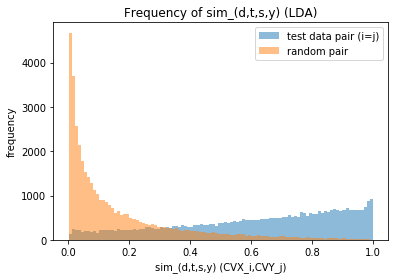

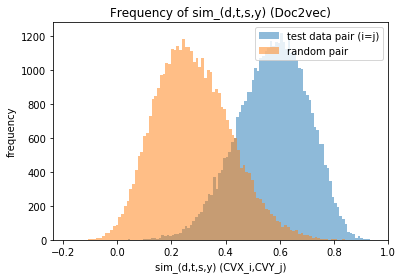

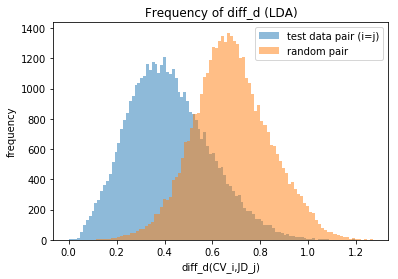

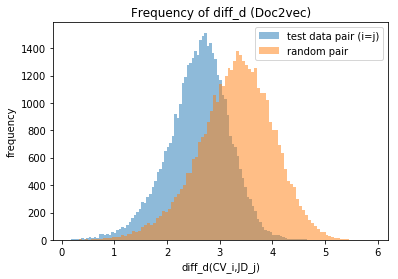

In [380]:
plot_2hist(test_lda_doc_cos_sims,rnd_lda_doc_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y) (CVX_i,CVY_j)','LDA')
plot_2hist(test_doc2vec_doc_cos_sims,rnd_doc2vec_doc_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y) (CVX_i,CVY_j)','Doc2vec')
plot_2hist(test_lda_doc_eu_dists,rnd_lda_doc_eu_dists,'diff_d','diff_d(CV_i,JD_j)','LDA')
plot_2hist(test_doc2vec_doc_eu_dists,rnd_doc2vec_doc_eu_dists,'diff_d','diff_d(CV_i,JD_j)','Doc2vec')



# jt

In [384]:
# test_lda_jt_eu_dists = get_testdata('eu',lda_jts_avg_vecs_dict)
# rnd_lda_jt_eu_dists = get_rnddata('eu',lda_jts_avg_vecs_dict,len(test_lda_jt_eu_dists))
# test_doc2vec_jt_eu_dists = get_testdata('eu',doc2vec_jts_avg_vecs_dict)
# rnd_doc2vec_jt_eu_dists = get_rnddata('eu',doc2vec_jts_avg_vecs_dict,len(test_doc2vec_jt_eu_dists))
test_lda_jt_cos_sims = get_testdata('cos',lda_jts_avg_vecs_dict)
rnd_lda_jt_cos_sims = get_rnddata('cos',lda_jts_avg_vecs_dict,len(test_lda_jt_cos_sims))
test_doc2vec_jt_cos_sims = get_testdata('cos',doc2vec_jts_avg_vecs_dict)
rnd_doc2vec_jt_cos_sims = get_rnddata('cos',doc2vec_jts_avg_vecs_dict,len(test_doc2vec_jt_cos_sims))

Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Java Architect
Java Architect

-------------------

Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Sr. PHP Developer
Sr. PHP Developer

-------------------

Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Sr. Java UI Developer
Sr. Java UI Developer

-------------------

Estate Manager/ Sales Agent
National Sales Representative

-------------------

Data Science Intern
Data Analyst/ Engineer

-------------------

SYSTEMS ENGINEER III
Systems Engineer II

-------------------

AWS Systems Engineer
Cloud Systems Engineer

-------------------

Software Development Manager, Website Accessibility
Software Development Manger, SCOT

-------------------

Sr. PM Lead Global Project
IT Sr Portfolio Project Leader

-------------------

Lead Network Technician III
Lead Network Technician

-------------------

Data Cen

GLOBAL WAN NETWORK SPECIALIST
NETWORK CONSULTANT

-------------------

Network administrator
Install and configure network Courthouse and provide

-------------------

Anthem Technology Bar \ Desktop Management Analyst Sr.\Work
Desktop Management Analyst Sr

-------------------

Support Engineer II
Support Engineer II Support Specialist II

-------------------

Network Administrator
Sr. Network Engineer, L3

-------------------

Data Analyst
Data Specialist

-------------------

Data Analyst
Data Analyst

-------------------

DATA ANALYST
SENIOR DATA ANALYST

-------------------

Mindlance - Data Analyst
Data Analyst

-------------------

Data Analyst
Data Scientist

-------------------

Data Analyst
Data Analyst

-------------------

Senior Data Analyst
Data Scientist

-------------------

Data Analyst / Cognos Teacher-Developer
Data Analyst / Report Developer Sr. / Excel Expert

-------------------

Data Science Consultant
Data Scientist

-------------------

Data Analytics Intern
Da

.NET Developer

-------------------

Sr. Security Engineer
Senior Security Engineer

-------------------

Principal Network Consultant
Cisco Network Administrator

-------------------

Network Engineer II
Network Engineer II

-------------------

Network Engineer
Network Engineer

-------------------

Engineering Consultant
Engineering Consultant

-------------------

Network Engineer
Network Engineer

-------------------

Senior Network Engineer
Senior Network Engineer

-------------------

Network Engineer
Sr. Network Engineer - Consultant

-------------------

Desktop Support Analyst
Desktop Support and Field Technician

-------------------

Full Stack .Net Developer
Full Stack .Net Developer

-------------------

Lead .Net Developer
Lead .Net Developer

-------------------

Application Developer
Application Developer

-------------------

Database/VB Programmer
Database Programmer/Developer

-------------------

.NET Developer (Lead)
NET Developer (Lead)

-------------------

C#.NE

PROJECT MANAGER
SENIOR PROJECT MANAGER

-------------------

Project Manager
Project Manager/Owner

-------------------

Sr. .Net developer
Sr. .Net Developer

-------------------

Project Manager
Senior Project Coordinator

-------------------

Sr.ETL Informatica Developer
Sr. ETL Informatica Developer

-------------------

ETL Developer
Sr. ETL/IDQ Developer

-------------------

Sr. ETL DEVELOPER
Sr. ETL DEVELOPER

-------------------

CEO
Founder & CEO

-------------------

SVP Product Development
Product Development Consultant

-------------------

CHIEF EXECUTIVE OFFICER
CHIEF EXECUTIVE OFFICER

-------------------

SharePoint Independent Contractor
Senior SharePoint Administrator/Senior SharePoint Developer - Senior .Net Developer

-------------------

Lead Software Engineer(Mobile)
Sr. Manager, Software Engineering - Mobile

-------------------

Software Engineering Mentor
Senior Analyst, Solutions Developer in Software Engineering

-------------------

Mass-data Analytics Engi

Technical Publications Technical Specialist
Technical Publications Technical Specialist

-------------------

ORACLE DATABASE ADMINISTRATOR
Sr. ORACLE DATABASE ADMINISTRATOR

-------------------

ORACLE DATABASE ADMINISTRATOR
ORACLE DATABASE ADMINISTRATOR

-------------------

Oracle Database Administrator (Full Time)
Senior Oracle Database Administrator

-------------------

Oracle Database Administrator
SQL Database Administrator

-------------------

Oracle DBA
Sr. Oracle DBA

-------------------

Oracle Lead DBA
Sr Oracle DBA

-------------------

Aircraft Painter
Aircraft Painter

-------------------

Security Coordinator - Senior Security Compliance Analyst
Information Security Manager

-------------------

Sr. Web Developer
Sr. Web Developer

-------------------

Senior Mobile / Web Developer
Senior Mobile / Web Developer

-------------------

Senior Java Developer
Senior Java Developer

-------------------

DevOps and Cloud Engineer
DevOps and Cloud Engineer

------------------

Chantilly - Sales & Leasing Professional
Sales & Leasing Consultant

-------------------

Deputy Program Manager / IT Operations Manager
Program Manager

-------------------

Information Security Specialist
IT Security Specialist IV

-------------------

Network Engineer
Network Subject Matter Expert (SME)

-------------------

Senior Network
Senior Network Engineer

-------------------

Program/Data Analyst
Data Analyst

-------------------

Data Entry Clerk
Data Analyst

-------------------

Bilingual Specialist, National Student Loan Data System for Professionals
Bilingual Program Analyst, National Student Loan Data System

-------------------

Claims Examiner II
Claims Examiner II

-------------------

Senior Systems Analyst
Principal Systems Analyst

-------------------

Information Security Specialist
Senior Cyber Security Engineer

-------------------

Systems Engineer II
Senior Systems Engineer

-------------------

AITEL contract-SR. Network Engineer
Currently Network SNAP Eng

Software Developer/Admin
Software Developer

-------------------

Senior Android Mobile App Developer
Senior Android Mobile App Developer/Architect

-------------------

Senior Microsoft Dynamics CRM Developer
Microsoft Dynamics CRM Developer

-------------------

Xamarin Developer
Xamarin Developer

-------------------

Senior Microsoft Dynamics CRM Developer
Microsoft Dynamics CRM Developer

-------------------

Xamarin Developer
Xamarin Developer

-------------------

Microsoft Dynamics CRM Developer
Senior Microsoft Dynamics CRM Developer

-------------------

Microsoft Dynamics CRM Developer
Senior Microsoft Dynamics CRM Developer

-------------------

Net Developer
Sr .Net Developer

-------------------

RPA Developer
RPA Developer

-------------------

Sr. .Net Developer
Sr. .Net Developer

-------------------

Sr. Full Stack Java Developer
Sr. Full Stack Java Developer

-------------------

Net Developer
Net Developer

-------------------

Sr .Net Developer
Sr.Net Developer/Ang

Oracle PLSQL Developer/ETL Developer
Oracle Developer/ETL Developer

-------------------

Database engineer
Database architect

-------------------

Senior ETL Pentaho Developer (PDI)
Senior ETL Pentaho Developer (PDI)

-------------------

Project Coordinator (10 month Contract)
Construction Project Manager

-------------------

Senior OCC Windows Systems Engineer III
Senior Windows Systems Engineer III

-------------------

SOFTWARE ENGINEER - DPL
SOFTWARE ENGINEER - Wiseman Innovations

-------------------

RPA Developer(Automation Anywhere)
RPA Developer(Automation Anywhere)

-------------------

Oracle Cloud Functional Consultant
Oracle Fusion Cloud Functional Consultant

-------------------

SOX Auditor
SOX Auditor

-------------------

Consultant
Consultant

-------------------

Carrier Manager
Owner/Manager

-------------------

Lead Software Engineer
Software Engineer

-------------------

Business Systems Analyst
Senior Business Systems Analyst

-------------------

Business 

Network Engineer

-------------------

Network Engineer
Network Engineer

-------------------

Linux System Support Engineer
Linux System Support Engineer

-------------------

Sr. Cloud DevOps Engineer
Sr. Cloud DevOps Engineer

-------------------

DevOps Engineer/ Cloud Engineer
Cloud Engineer/Devops Engineer

-------------------

Sr. Data Analyst III
Sr. Data Analyst

-------------------

Workday Consultant
Workday HCM Consultant

-------------------

Order Support Specialist
Technical Support Specialist

-------------------

Service Desk Analyst
Remote Field Service Analyst

-------------------

Help Desk Support for Sona Bank
Microsystems Support Technician

-------------------

Sr. Java Developer
Sr.Java Developer

-------------------

Sr. Java/Angular Developer
Sr. Java/Angular Developer

-------------------

Java/J2ee Developer
Java/J2ee developer

-------------------

Sr. Java Developer
Sr. Java/J2EE Developer

-------------------

Java Full-Stack Developer
Java Developer

--


Oracle Database Administrator
Oracle Database Administrator

-------------------

Systems Engineer
Senior Systems Engineer

-------------------

Application Analyst
Independent Consultant Application Developer-Programmer/Analyst

-------------------

Sr. Software Developer/Technical Lead - Java Development
Sr. Software Engineer - Java Development

-------------------

Financial Analyst / Web App Developer
Contract Web App Developer

-------------------

Software Engineer
Software Engineer

-------------------

IT Specialist
IT Specialist

-------------------

Architectural Designer
Revit Architectural Designer

-------------------

Machine Operator
Machine Operator

-------------------

Vice President, Group Manager, Senior Project Manager
President, Principal, Senior Project Manager

-------------------

Chief Systems Engineer
Chief Systems Engineer OMES II Contractor

-------------------

Senior Systems Engineer
Senior Systems Engineer

-------------------

Senior Systems Engineer
S

Sr. SAS Programmer
Sr.SAS Programmer

-------------------

Oracle PL/SQL developer
Database developer and Analyst

-------------------

Senior Software Engineer
Senior Software Engineer

-------------------

DESKTOP SUPPORT ANALYST
SENIOR IT SUPPORT ENGINEER

-------------------

Senior Documentum Consultant
Senior Documentum Consultant

-------------------

Infrastructure Technical Support Senior Analyst, (VMware Systems Admin)
Infrastructure Technology Support Specialist (VMware Systems Engineer)

-------------------

Data Developer
Data Developer

-------------------

Senior Data Analyst
Senior Data Analyst

-------------------

Senior Data Analyst
Data Scientist

-------------------

Data Science/Strategy Intern
Data Scientist / Engineer

-------------------

SR. PROJECT MANAGER, Evolent Health
IV&V Project Manager

-------------------

Data Analyst
Data Analyst

-------------------

Data Analyst
Data Science Analyst, Digital

-------------------

Data Scientist
Senior Data Scienti


-------------------

.NET Developer
Sr.NET Developer

-------------------

Net Developer
Net Developer

-------------------

.NET Developer
Sr. .NET Developer

-------------------

Advanced Technical Support Professional Ericsson RAN
Advanced Technical Support – Senior Ericsson RAN - May 1st 2016 to present

-------------------

Advanced Technical Support Engineer
Senior-Advanced Technical Support Engineer

-------------------

Help Desk Support Technician
Helpdesk Support Engineer

-------------------

Senior Support Engineer ETAS
Tier 3 Principal - Advanced Technical Support Engineer

-------------------

Project Manager
Project Manager(Life-Cycle)

-------------------

Project Manager
IT Project Manager

-------------------

JAVA Lead/IT Sr. Program Manager
Java Tech Lead/ Agile IT Sr. Program Manager (MDM Program)

-------------------

Senior IT Project Manager - Ford Motor Company
Senior Project Manager - Ford Motor Company

-------------------

Management Consulting
Management C


-------------------

Senior Software Engineer / Data Scientist
Senior Software Engineer / Senior Data Engineer

-------------------

Scrum Master/Project Manager
Scrum Master/Project Manager

-------------------

Senior Oracle DBA
Consultant - Sr. Oracle DBA

-------------------

DBA/ Independent Consultant
DBA/ Independent Consultant

-------------------

Senior Database Engineer
Senior Database Developer (Contractor)

-------------------

Database Administrator
Database Administrator

-------------------

Senior Oracle Applications DBA/Tech Lead/Architect
Senior Oracle Database and Applications Administrator

-------------------

Cyber Security Analyst
Cyber Security Analyst

-------------------

Cyber Security Analyst
Cyber Security Analyst

-------------------

Senior Oracle Developer
Sr Oracle Developer

-------------------

Programmer/Analyst
Programmer/Analyst

-------------------

Sr. Oracle Developer
Sr Oracle PL/SQL developer

-------------------

Oracle DBA Consultant
Oracl

Senior Unix/Linux System Administrator

-------------------

Resource Manager
Resource Manager

-------------------

Inside Sales Representative
Inside Sales Representative

-------------------

Technology Consultant IV
Technology Consultant IV

-------------------

Senior .Net Developer
Senior .Net Developer

-------------------

Sr .Net Developer
Sr. .Net Developer

-------------------

Sr. .Net Developer
Sr .Net Developer

-------------------

RPA Developer
RPA Developer

-------------------

Sr.SharePoint Lead Administrator
Sr.SharePoint Analyst/Developer

-------------------

Sr.Net Developer
Sr.C#.Net Developer

-------------------

.NET Developer
Sr.NET Developer

-------------------

.Net Episerver Developer
.Net Developer

-------------------

Mid-Level .Net Developer
Mid-Level .Net Developer

-------------------

Sr. .Net Developer
Sr. .Net Developer

-------------------

Sr. .Net Developer
Sr. .Net Developer

-------------------

Sr. .Net Developer
Sr. .Net Developer

------


-------------------

Sr. iOS Developer
Sr.iOS Developer

-------------------

Java Developer
Java Developer

-------------------

Senior Network Analyst
Senior Network Engineer

-------------------

Technical Support Engineer II
Field Support Analyst

-------------------

IT DESKSIDE SUPPORT TECHNICIAN
TECHNICAL SUPPORT ENGINEER

-------------------

Network Operations Engineer
Network Commissioning & Integration Engineer IV

-------------------

Junior Project Manager
Project Manager

-------------------

Spotfire Developer and Admin
Tibco Spotfire Developer and Admin

-------------------

Qlikview Developer
Qlikview Developer

-------------------

Qlikview Developer
Qlikview Developer

-------------------

Qlikview Developer
Sr. Qlikview Developer

-------------------

Sr. Business Intelligence and Developer
Sr. SAP Business Intelligence and Developer

-------------------

Database Developer
Database Developer w/ SSIS and SSRS Expert

-------------------

UX/UI Designer IV
Sr. UX/UI


-------------------

Database Administrator
Senior Database Engineer

-------------------

Oracle Database Administrator
Oracle Database Administrator

-------------------

Oracle Database Administrator
Oracle Database Administrator

-------------------

Teradata Database Architect
Teradata Database Architect

-------------------

Sr DBA
Database Consultant\Manager

-------------------

Teradata Database Administrator
Oracle GoldenGate Engineer

-------------------

Senior Database Administrator
Senior Database DBA/Developer

-------------------

SQL Server Database Administrator
SQL Server DBA

-------------------

IT Specialist (Security)
IT Security Engineer

-------------------

NASA Security Operation Center Tier 2 Analyst
NASA Security Operation Center Detection Manager

-------------------

Sr. Systems Admin Specialist Advisor
Senior Systems Engineer

-------------------

Principal, Information Security
Information Security (Manager-Director)

-------------------

IT Director/C

Hadoop Developer
Spark /Bigdata Developer

-------------------

Java Developer
Java Developer Consultant

-------------------

Senior ADF Developer
Senior Developer (ADF and basic SOA)

-------------------

Senior J2EE Developer
Senior J2EE Developer

-------------------

Big Data Software Engineer
Big Data Software Engineer

-------------------

Data Analyst
Data Science Intern

-------------------

Graduate Assistant (Data Analyst)
Data Analyst (MTS -2)

-------------------

Regulatory Affairs Intern
CMC Regulatory Affairs

-------------------

Data Scientist
Data Scientist

-------------------

Business Analyst - Data Analytics & Artificial Intelligence for SDLC
Data Analyst

-------------------

Market Data Analyst
Data Analyst

-------------------

Data Analyst - Market Research & Audience Segmentation
Data Analyst

-------------------

Oracle FMW Administrator
Oracle Fusion Middleware (SOA/OSB/WebLogic) Administrator

-------------------

Sr. Oracle Pl/SQL Developer
Sr. Oracle Pl

Customer Service Associate
Customer Success Specialist - Clinical & Technical Tier 1

-------------------

Licensed Insurance Agent
Licensed Insurance Agent

-------------------

Support Technician
Support Technician

-------------------

SAP Business Intelligence/Business Objects Consultant
SAP Business Intelligence Consultant

-------------------

Sr.SAP Business Intelligence Consultant
Sr.SAP Business Intelligence Consultant

-------------------

ORACLE DATABASE ADMINISTRATOR
ORACLE DATABASE ADMINISTRATOR

-------------------

Database Administrator
Database Administrator

-------------------

Oracle Database Administrator
Database Manager/Principal Database Administrator

-------------------

SQL Developer/SSIS/SSRS
SQL BI Developer (SSIS/SSRS)

-------------------

IT Security Project Manager
Global Information Security/Project Manager

-------------------

Sr. IT Project Manager
American Partners, Sr. IT Project Manager

-------------------

Senior Project Manager
Lead Project Ma

Sr.NET Developer
Sr.NET Developer

-------------------

Full Stack .Net Developer
.Net Developer

-------------------

NET Developer
NET Developer

-------------------

Sr. Net Developer
Senior .Net Developer

-------------------

Senior .Net Developer
Senior .Net Developer

-------------------

.NET Developer
.NET Developer

-------------------

Full Stack .Net Developer
Full Stack .Net Developer

-------------------

Senior .Net developer
Sr .Net Developer

-------------------

Senior .Net Developer
Senior .Net Developer

-------------------

Sr.Net Developer
Sr.NET Developer

-------------------

Senior BizTalk/.Net Developer
Senior BizTalk/.Net Developer

-------------------

Lead Developer/Designer
Lead Developer/Designer/TFS Admin

-------------------

Sr. Full Stack .Net Developer
Sr. Full Stack .Net Developer and Salesforce Programmer

-------------------

C#.NET Full Stack Developer
Sr.C#.NET Full Stack Developer

-------------------

Sr. Developer
Sr. Developer

-------------

16
Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Java Architect
Java Architect

-------------------

Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Sr. PHP Developer
Sr. PHP Developer

-------------------

Sr. Java/J2EE Developer
Sr. Java/J2EE Developer

-------------------

Sr. Java UI Developer
Sr. Java UI Developer

-------------------

Sr. Java Developer
Sr. J2EE Developer

-------------------

Sr. Change Manager / Sr. Project Manager / Sr. Mechanical Engineer
Sr. Program Manager / Sr. Operations Manager / Sr. Mechanical Engineer

-------------------

Senior Product Manager
Senior Technical Product Manager

-------------------

SYSTEMS ENGINEER III
Systems Engineer II

-------------------

Sales and Leasing Consultant
Sales and Leasing Consultant

-------------------

Software Development Intern
Software Development Engineer Intern

-------------------

Software Engi


-------------------

Senior .NET, Dynamics CRM
Senior .NET, Dynamics CRM

-------------------

Technical Architect, Lead Developer
Technical Architect, Lead Developer

-------------------

Sr. ETL INFORMATICA DEVELOPER
Sr. ETL INFORMATICA DEVELOPER

-------------------

INFORMATICA ETL DEVELOPER
SR.ETL INFORMATICA DEVELOPER

-------------------

SR. ETL INFORMATICA DEVELOPER
SR. INFORMATICA ETL DEVELOPER

-------------------

Sr. Informatica Administrator
Sr. Informatica Administrator

-------------------

SR. DW INFORMATICA LEAD DEVELOPER
SR. DW INFORMATICA LEAD DEVELOPER

-------------------

INFORMATICA ETL DEVELOPER
SR.ETL INFORMATICA DEVELOPER

-------------------

Sr ETL Informatica Developer
Sr Informatica Developer

-------------------

Informatica Developer
Informatica Developer

-------------------

Sr. Tableau Developer
Sr. BI/Tableau Developer

-------------------

Data Specialist
Data Specialist

-------------------

Data Architect
Data Architect

-------------------

Sha

Senior Data Analyst

-------------------

Senior Marketing Manager | U.S. Marketing & Operations | Students & Startups
Senior Global Marketing Manager | Microsoft Digital Store, eCommerce

-------------------

Corporate IT Recruiter
Corporate IT Recruiter

-------------------

Network Security Consultant
Network Security Consultant

-------------------

Senior Accountant
Senior Accountant

-------------------

Technical Program Manager
Technical Program Manager

-------------------

Senior IT Program Manager
Senior Technical Program Manager

-------------------

NET Developer
NET Developer

-------------------

Net Developer
Net Developer

-------------------

Net Developer
Net Developer

-------------------

Senior .Net Developer
Senior .Net Developer

-------------------

Sr .Net Developer
Sr. .Net Developer

-------------------

Sr.NET Developer
Sr .NET Developer

-------------------

Net Developer
Net Developer

-------------------

Senior.Net Developer
Senior.Net Developer

------


-------------------

Performance Test Engineer/QA Engineer
Performance Test Engineer/QA Engineer

-------------------

Java Developer
Java Developer

-------------------

Sr. Java Developer
Sr. Java/J2ee Developer

-------------------

Sr. Java/J2ee Developer
Sr. Java Developer

-------------------

Senior Java Developer
Senior Java Developer

-------------------

Java Developer
Java Developer

-------------------

Java Developer
Java Developer

-------------------

Salesforce Administrator
Salesforce Administrator

-------------------

Java Front-End Developer
Java Front-End Developer

-------------------

Java UI developer
Java UI developer

-------------------

Java/J2ee developer
Java/J2ee Developer

-------------------

Sr Java/J2EE Fullstack Developer
Sr Java/J2EE Fullstack Developer

-------------------

SALESFORCE CONSULTANT
SALESFORCE CONSULTANT

-------------------

Software Engineer
Software Engineer

-------------------

Admin /Developer
Admin /Developer

-----------------


Senior Software Engineer
Senior Software Engineer

-------------------

Sr. Oracle Apps DBA
Sr. Oracle Apps DBA

-------------------

Sr. Full Stack Developer
Sr. Full Stack Developer

-------------------

Sr. Full Stack Developer
Sr. Full Stack Developer

-------------------

I.T. Manager
IT Manager

-------------------

IOS Application Developer
IOS Application Developer

-------------------

Senior Python Developer
Senior Python Developer

-------------------

Sr. JAVA/J2EE Developer
Sr. JAVA /J2EE Developer

-------------------

Full Stack .Net Developer
Full Stack .Net Developer

-------------------

SR. Microsoft Dynamics CRM Developer
SR. Microsoft Dynamics CRM Developer

-------------------

SR. Microsoft Dynamics CRM Developer
SR. Microsoft Dynamics CRM Developer

-------------------

SR. UI Developer
SR. UI Developer

-------------------

Senior Drupal Developer
Senior Drupal Developer

-------------------

Python Developer
Python Developer

-------------------

Sr. Python D

Helpdesk Support
Helpdesk Support

-------------------

Operations Clerk
Operations Clerk

-------------------

Senior Director, Interactive Sales
Executive Director, Interactive Sales

-------------------

Retail Sales Consultant
Retail Sales Consultant

-------------------

IT Field Service Technician
IT Field Service Technician

-------------------

SQL Developer
SQL Developer

-------------------

Ruby on Rails lead
Ruby on Rails Developer

-------------------

Ruby on Rails Developer
Ruby on Rails lead

-------------------

Spark /Bigdata Developer
Bigdata/Spark application developer

-------------------

Test Lead
Test Lead

-------------------

Sr. UI Developer
Sr. UI Developer

-------------------

Account Manager
Account Manager

-------------------

SQL Server DBA
SQL Server DBA

-------------------

Sr. Java Developer
Sr. Java Developer

-------------------

Java/J2EE Design & Sr Developer
Java/J2EE Design & Lead Developer

-------------------

Project Manager
Project Manage

UI / JEE Developer (Full Stack developer)

-------------------

UI / JEE Developer (Full Stack developer)
UI / Java Developer (Full Stack developer)

-------------------

Java Full Stack Developer
Java Full Stack Developer/ AWS Developer

-------------------

Java Developer
Java Developer

-------------------

BigData Engineer
BigData Engineer

-------------------

Java Developer
Java Developer

-------------------

Mule soft Developer
Mule soft Developer

-------------------

DevOps Engineer
DevOps Engineer

-------------------

Sr. Java Developer
Sr. Java Developer

-------------------

Java Full Stack Developer
Java Full Stack Developer

-------------------

Java/J2EE/UI Developer
Java/J2EE/UI Developer

-------------------

Sr. Full Stack Java Developer
Full Stack Java Developer

-------------------

Director of Operations /Human Resources (remote)
Chief of Operations/Director of Human Resources (remote position)

-------------------

Director of Business Development
Director of Bu


Solutions Architect / Technical Architect
Solutions Architect / Technical Architect

-------------------

Technical Project Manager
Technical Project Manager

-------------------

PRODUCT OWNER
PRODUCT OWNER

-------------------

Business Systems Consultant
Business Systems Consultant

-------------------

Salesforce Consultant
Salesforce Consultant

-------------------

WCS Technical Architect / Senior WebSphere Commerce Developer
WCS Solution Architect / Senior WebSphere Commerce Developer

-------------------

Mobile Application Developer
Mobile Application Developer

-------------------

Java Lead/Senior Software Engineer
Java Lead/Senior Software Engineer

-------------------

Network Engineer
Network Engineer

-------------------

Senior Staff Site Reliability Engineer
Senior Site Reliability Engineer

-------------------

Director
Director

-------------------

Sr. Oracle BI Architect
Sr. Oracle BI Architect

-------------------

Business Analyst /System Analyst
Business Analys

UI Developer

-------------------

Web Designer/Developer
Web Designer/Developer

-------------------

Director
Director

-------------------

Web Designer and Developer
Web Designer and Developer

-------------------

Software Developer
Software Developer

-------------------

TECHNICAL WRITER
TECHNICAL WRITER

-------------------

Firmware Test Engineer
Firmware Test Engineer

-------------------

Principal Technical Staff Member
Principal Technical Staff Member

-------------------

SDET
SDET

-------------------

Technology Analyst
Technology Analyst

-------------------

Software Test Engineer
Software Test Engineer

-------------------

SDET- Software Development Engineer in Test
SDET- Software Development Engineer in Test

-------------------

C++ Senior Developer
C++ Senior Developer

-------------------

Python Developer
Python Developer

-------------------

Sr. Tableau Developer/ Visualization Expert
Sr. Tableau Developer/ Visualization Expert

-------------------

Business 

Sr. Business Analyst
Sr. Business Analyst Consultant

-------------------

Sr. PHP Developer
Sr. PHP Developer

-------------------

Senior Java Developer
Senior Java Developer

-------------------

Sr. UI Developer
Sr. UI Developer

-------------------

Sr. Front End Web Developer
Sr. Front End Web Developer

-------------------

ServiceNow Consultant
ServiceNow Consultant

-------------------

Sr. PHP Developer
Sr. PHP Developer

-------------------

Sr. AEM Developer
Sr. AEM Developer

-------------------

Sr. AEM Developer
Sr. AEM Developer

-------------------

Sr. UI Developer (Angular JS)
Sr. Frontend UI Engineer (Angular JS)

-------------------

Consultant
Consultant

-------------------

Data Consultant
Data Consultant

-------------------

Data Scientist
Data Scientist

-------------------

Lead Business Data Analyst/Utilization Management/Care Management
Lead Business Analyst (Data Analysis)/Utilization Management/Care Management

-------------------

Machine Learning Engin


-------------------

Software Engineer
Software Engineer

-------------------

QA Test Engineer
QA Test Engineer

-------------------

ETL Informatica Developer
ETL Informatica Developer

-------------------

Sr. Informatica Developer/Application Developer
Sr. Informatica Developer

-------------------

Sr. ETL/Informatica Developer
Sr. ETL/Informatica Developer

-------------------

Informatica Developer
Informatica Developer

-------------------

Senior Informatica Developer
Senior Informatica Developer

-------------------

ETL/Informatica Developer
Sr. ETL/Informatica Developer

-------------------

Sr. Informatica Developer
Sr. Informatica, ETL Developer

-------------------

ETL/Informatica Developer
Sr. ETL/Informatica Developer

-------------------

Sr. Informatica Developer
Sr. Informatica Developer

-------------------

Sr. Informatica Developer
Sr. Informatica Developer

-------------------

ETL Informatica Developer
Informatica Developer

-------------------

Informatica D

Graphic Designer
Graphic Designer

-------------------

Lead UI/UX Designer
Lead UI/UX Designer

-------------------

Freelance UI Designer
Freelance UX/UI Designer

-------------------

User Experience Designer
User Experience Designer

-------------------

Lead User Experience Architect
Lead User Experience Architect

-------------------

(QA Test Engineer (Software & Hardware) Integration)
(QA Test Engineer (Software & Hardware) & Integration)

-------------------

Sr. Oracle PL/SQL Developer
Sr. Oracle PL/SQL Developer

-------------------

Oracle SOA/OSB Developer
Oracle SOA/OSB Developer

-------------------

Magento Solutions Architect/Lead Developer
Magento Solutions Architect/Lead Developer

-------------------

Oracle Technical/Functional Consultant
Oracle Technical/Functional Consultant

-------------------

Oracle Applications DBA
Oracle Applications DBA

-------------------

Tier I Technical Support Specialist
Tier I Technical Support Specialist

-------------------

Micro

Sr. Dot Net Full Stack Developer

-------------------

Sr. Full Stack UI Developer
Sr. Full Stack UI Developer

-------------------

Network Consultant
Network Consultant

-------------------

SENIOR PROJECT MANAGER
SENIOR IMPLEMENTATION PROJECT MANAGER

-------------------

Data Architect
Data Architect

-------------------

Network Engineer
Network Engineer

-------------------

Network Security Engineer
Network Security Engineer

-------------------

Associate Product Owner
Associate Product Owner

-------------------

Data Analyst/Data Modeler
Sr. Data Analyst/Data Modeler

-------------------

Data Scientist/Machine Learning
Data Scientist/Machine Learning

-------------------

Data Scientist
Data Scientist

-------------------

Sr. Data Analyst/Data Modeler
Data Analyst/Data Modeler

-------------------

Data Analyst
Data Analyst

-------------------

Data Scientist
Data Scientist

-------------------

Data Analyst,Data Modeler
Sr. Data Analyst,Data Modeler

-------------------



Sr. Software Developer (IOS)
Sr. IOS Developer

-------------------

Senior Android Developer
Senior Android Developer

-------------------

Sr.NET Developer
Sr.NET Developer

-------------------

Dot net developer
Dot net developer

-------------------

Senior Project Manager / Agile Coach
Agile Project Manager / Scrum Master / Coach

-------------------

Sr. Front End UI Developer
Sr. Front End UI Developer

-------------------

Sr. Front End UI Developer
Sr. Front End UI Developer

-------------------

UX Design Intern
UX Design Intern

-------------------

Software Engineer
Software Engineer

-------------------

Sr. Oracle Middleware Developer
Sr. Middleware Developer

-------------------

NOC Analyst
NOC Analyst

-------------------

Major Incident Manager (Contractor Position - Sterlite Software)
Major Incident Manager (Contractor Position - Nfolks)

-------------------

ETL Informatica Developer
ETL Informatica Developer

-------------------

Application Packaging Engineer
Appl

0


/research/dept3/chlo6/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/research/dept3/chlo6/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



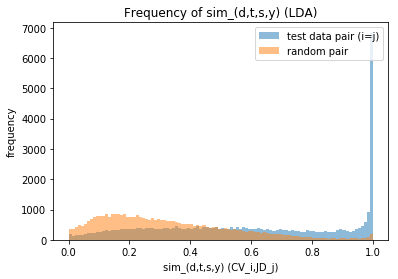

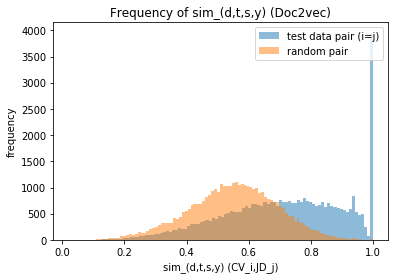

In [382]:
plot_2hist(test_lda_jt_cos_sims,rnd_lda_jt_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y) (CV_i,JD_j)','LDA')
plot_2hist(test_doc2vec_jt_cos_sims,rnd_doc2vec_jt_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y) (CV_i,JD_j)','Doc2vec')


In [375]:
test_lda_skills_eu_dists = get_testdata_skills('eu',lda_skills_vecs_dict,lda_doc_vecs_dict)
rnd_lda_skills_eu_dists = get_rnddata_skills('eu',lda_skills_vecs_dict,lda_doc_vecs_dict,len(test_lda_skills_eu_dists))
test_doc2vec_skills_eu_dists = get_testdata_skills('eu',doc2vec_skills_vecs_dict,doc2vec_doc_vecs_dict)
rnd_doc2vec_skills_eu_dists = get_rnddata_skills('eu',doc2vec_skills_vecs_dict,doc2vec_doc_vecs_dict,len(test_doc2vec_skills_eu_dists))
test_lda_skills_cos_sims = get_testdata_skills('cos',lda_skills_vecs_dict,lda_doc_vecs_dict)
rnd_lda_skills_cos_sims = get_rnddata_skills('cos',lda_skills_vecs_dict,lda_doc_vecs_dict,len(test_lda_skills_cos_sims))
test_doc2vec_skills_cos_sims = get_testdata_skills('cos',doc2vec_skills_vecs_dict,doc2vec_doc_vecs_dict)
rnd_doc2vec_skills_cos_sims = get_rnddata_skills('cos',doc2vec_skills_vecs_dict,doc2vec_doc_vecs_dict,len(test_doc2vec_skills_cos_sims))


0
0
[('auto_mechanic', 10), ('quality_control', 0.5), ('maintenance', 0.5)]
-   Quality Control of inventory and problem solving -   Auditing shipments and inbound materials.

----------

[('compensation', 10), ('governance', 5), ('operations', 10), ('oracle', 5), ('sales_compensation', 7)]
• Lead division daily compensation administration, operations, strategy, governance, and process development. • Program management of large-scale initiatives across distributed markets, covering twelve hospitals with over 15k employees. • Streamlined business processes and harmonized policies across division to align with corporate structure. • Administer annual focal cycle processes including merit, market analysis, and executive bonuses. • Performed extensive financial modeling and data analytics for acquisition, divestitures, and labor negotiations. Short and Long-term strategy and planning with impact analysis.  Develop metrics and KPIs to assess health of compensation structures. • Build and cu


----------

[('ada', 2), ('cleanroom', 4), ('laser', 4), ('optics', 10), ('unix', 2), ('test_&_verification', 7)]
Build a complete integration, verification & test plan for DreamChaser. Organize and maintain details of verification plans and processes in DOORS. Synchronize with IVT and subsystem owner counterparts. Provide expertise and guidance to the less experienced team members.

----------

[('altiris', 0.5), ('exchange', 0.5), ('ghost', 0.5), ('groupwise.', 0.5), ('ipad', 10)]
• Account Administration via Active Directory: Ensure that customers are in the correct AD groups and OU, change user passwords, unlock users accounts. • Unlock AD on the various domain controllers via unlock tool. • Change WSSC employee contact information via WSSC Blue Book. • Create Users in Mainframe via Rumba, Change passwords, suspend and delete accounts. • Manage the deployment and security of devices and applications across enterprise. • Troubleshoot customer's computer problems  via System Center 

[('exchange', 6), ('microsoft_exchange', 0.5), ('system_administration', 0.5), ('disaster_recovery', 0.5), ('customer_service', 0.5), ('inventory', 0.5), ('scheduling', 0.5)]
•   Implemented a sitewide (NYC, London, NJ colo) infrastructure upgrade project for Halcyon Asset Management, encompassing HP/Windows server upgrades, a WDS Windows 7 Lite-Touch deployment, VMWare 5.0 upgrades and a new Citrix Xenapp 6.5 Platinum installation with documentation for under $220,000 from November 2010 to June 2012. •  Completed a new medical office build out and EMR installation (comprising all aspects of required hardware (wiring/firewall/server/desktops/laptops/tablets/VoIP/mobile) in HIPAA compliance, outbidding a more established and larger MSP by 18K for a savings of 45%.

----------

[('technical_support', 2)]
• Set up new users in ECMS and assign the proper privileges, permissions, dashboards and reports to them • Inactivate terminated users accounts and reassign their tasks to their managers

[('information_assurance_and_security', 0.5), ('cyber_security', 0.5), ('microsoft_word', 0.5), ('microsoft_powerpoint', 0.5), ('microsoft_excel', 0.5), ('access', 0.5), ('training', 0.5), ('jpas', 0.5), ('nispom', 0.5), ('comptia_a+', 0.5), ('comptia_network+', 0.5), ('remedy', 0.5), ('troubleshooting', 0.5), ('computer_hardware', 0.5), ('computer_repair', 0.5), ('software', 0.5), ('spot', 0.5), ('nessus', 0.5), ('information_security', 0.5), ('risk_management_framework', 0.5), ('scap', 0.5), ('stig', 0.5), ('sims', 0.5)]
RMF, Security Compliance, System Evaluation, STIG, SCAP • Performs system monitoring and analysis support for the detection of cyber incidents and provides recommendations on how to correct findings • Develops Risk Management Framework (RMF) Certification and Accreditation documentation, standard operating procedures, policies and security instructions for both networked computer systems and provides oversight and guidance for multiple systems • Responsible for suppo

• Stationed at New York Edge since hire date • Active Directory Support • Google G-Suite Administrator • Use of Windows Server 2008/2012 • Helped End Users troubleshooting a variety of issues with technology apps • Configured IOS devices and iPads to corporation and IT Compliance Standards • Remote Service on Laptops. PC Workstations, and Printers • Configuring Site Technology Equipment (Laptops, Workstations, Printers, Switches) • Connectwise Ticketing System • Working with different department managers to order technology equipment that met or exceeded needs • Assisted over 1,000 users in HQ/Sites

----------

[('active_directory', 0.5), ('cisco', 0.5), ('citrix', 0.5), ('dhcp', 0.5), ('lan/wan', 0.5)]
• Support of a 400+ user environment from all over the US and Canada, by setting up Dell and Microsoft Surface Pro PCs. • Troubleshooting hardware and software issues of both Windows 7 and 10. • Setup, unlock accounts, and changing passwords using Active Directory • Working with Citrix

[('checkpoint', 1), ('cisco', 3), ('dhcp', 0.5), ('dns', 0.5), ('encase', 0.5), ('mac', 0.5), ('metasploit', 1), ('nessus', 1), ('networking', 0.5), ('nmap', 0.5), ('router', 0.5), ('scanner', 1), ('security', 10), ('snmp', 0.5), ('solaris', 3), ('splunk', 0.5), ('vmware', 0.5), ('wireshark', 0.5), ('pci', 0.5), ('network_security', 0.5), ('siem', 0.5), ('information_security', 0.5)]
Conducted various security vulnerability assessments (e.g., Patch Analysis, Port Analysis, Malicious Code Analysis, and CERT Vulnerability Analysis, ) and documented the results in Certification Reports, Residual Risk Assessment Reports, User Security Policy Manuals, and Standing Operating Procedures. Identified and reported security issues, and resolving issues in accordance with established policies.

----------

[('military_operations', 0.5), ('security_clearance', 0.5), ('dod', 0.5), ('systems_thinking', 0.5), ('applied_research', 0.5), ('ms_windows_os/_office/project/_visio', 0.5), ('circuit_design_an

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('itil', 0.5), ('itsm', 0.5), ('incident_management', 0.5)]
• Managing start-up of LLC Business • Business partner, marketing & advertising, web-design, income and expense, estimating and invoicing

----------

[('cabling', 10), ('cisco', 10), ('voip', 10), ('project_management', 7), ('program_management', 2), ('network_security', 10), ('network_infrastructure', 10)]
• Manage multiple medium to large network infrastructure integration projects • Work with acquired entity on defining project SOW and timelines • Engage resources across multiple internal teams and third-party vendors • Create project plans and present program status reports to senior leadership • Identify issues, risk and dependencies; log actions, decisions and review lessons learned with project team. • Submit change controls, resolve issues and remove roadblocks.

----------

[('technical_support', 0.5), ('networking', 0.5), ('windows', 0.5), ('active_directory', 0.5)]
* Implemented Help Desk ticketing system (Service

[('best_practices', 10), ('project_management', 1), ('program_management', 1), ('change_management', 0.5), ('training', 0.5)]
Actively design, implement and maintain network, systems and applications. Plan, design and execute the migration of systems and applications to a Cloud environment and deliver operational maintenance.  Develop and provide implementation strategies for business processes, resource management and planning for and on-premise unclassified, classified and SCI networks. Advise COR and A/CORs on best practices, modernized technologies, and compliance strategies. * Direct a high performing team of engineers, administrators, integrators, configuration managers, help desk personnel, and project and program managers. * Maintain accountability for HR responsibilities related to personnel on the contract, including personnel requisition creation, interviews, hiring, and offer negotiations; additionally, draft subcontract agreements and manage subcontractors and consultants.

[('budgeting', 0.5), ('operations', 0.5), ('software_development', 0.5), ('disaster_recovery', 0.5), ('data_analytics', 0.5)]
• Implemented metrics to measure key Managed Services operations. These included project and customer service satisfaction. Consistently maintained a customer satisfaction above 95%. • Managed the implementation of over 175 users across three companies, while maintaining customer satisfaction across the client base. • Managed the implementation of multiple server and network upgrades and replacements for various clients/industries to support increasing revenue. • Implemented a series of organizational changes within Managed Services to improve operations and employee accountability across the organization.

----------

[('computer_hardware', 5), ('software_support', 5), ('computer_repair', 5), ('windows_server_2012_r2', 2), ('windows_7', 5), ('linux', 2), ('auditing', 2), ('printer_troubleshooting', 2), ('system_administration', 2), ('network_security', 2), ('ph


----------

[('windows_7', 2), ('windows_10', 5), ('computer_repair', 1), ('network_administration', 1), ('organizational_skills', 8), ('cooking', 8), ('kitchen_manager', 4), ('cabeling', 1)]
City, MO *Worked with programs such as Putty, Wire Shark Legacy, and Command Line. Set up and managed employee e-mail servers. Organized technical problems submitted by employees through a ticket system to help resolve issues quickly and efficiently. Operated a scissor lift to run Cat 6 cabling throughout the building to help connect staff equipment to servers. Regularly patched or fixed cables and set up RJ45 connections.

----------

[('illustrator', 4), ('photoshop', 10), ('acrobat', 10), ('microsoft_office', 10), ('mac', 4), ('premiere', 6), ('windows', 10)]
Responsible for the day to day operation and upkeep of the Walmart photo center in New Richmond Wi. Providing customer service and assistance. Fulfilling in store and online customer orders. Troubleshooting customer issues. Stocking shelf


----------

[('active_directory', 10), ('apqp', 1), ('assembly', 10), ('cisco', 5), ('crm', 0.5), ('data_backup', 4), ('dynamics_crm', 0.5), ('sonic_wall_firewalls', 2), ('intrusion_detection', 4), ('mac_os', 0.5), ('maintenance', 1), ('microsoft_dynamics', 0.5), ('microsoft_dynamics_crm', 0.5), ('microsoft_office', 4), ('ms_office', 1), ('wiring', 10), ('system_administrator', 0.5)]
• Office 365 administration • Azure AD administration • Manage service provider for 8 different accounts • Break/fix on local machines • Server 2013/2016 administration • Manage user access for Office 365 • Manage user access Jive Phones • Manage user access Windows virtual, traditional, and hybrid environments • Manage Cisco routers and SonicWall firewall • Cat 6 wiring and terminating

----------

[('onboarding', 4), ('project_management', 1), ('report_writing', 0.5), ('sql', 5), ('t-sql', 0.5), ('vmware', 0.5)]
Manage overall customer onboarding process working closely with sales teams to ensure custom

Supported customers by providing, processing, and prioritizing information in response to inquiries, concerns, and requests about products and services primarily via inbound calls.  • Represented clients in a positive, professional, and ethical manner while working to exceed customer and company expectations • Accurately processed and recorded call transactions using the designated tracking software

----------

[('security', 3), ('mcp', 0.5), ('mcsa', 0.5), ('windows_server_2003', 0.5), ('windows_xp', 0.5), ('data_analysis', 0.5), ('excel', 0.5), ('data_entry', 0.5), ('business_analysis', 0.5)]
Actively participate in problem analysis and resolution. Identify client requirements and issues.  Analyze operations to determine project scope and alternative solutions. Prepare detail system specifications. Develop technical requirements specifications for development team.

----------

[('merchant_mariner_certifiedf', 1)]
Manage day to day call voume by phone, email and ticketing system. Re

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[('french', 10), ('english_and_lingala_speaking', 10)]
Advanced Capability Advocate for Microsoft Account takeover case handling Module for Devices (MSA), X-Box 360, S, One, X and Online Microsoft account, Escalations cases from the frontline (Tier 1); • Accounts takeover (ATO), verify ownership of any (MSA) from any online or physical attacker. • Fraud prevention, Security, identify suspicious activity, Investigate claims, lawful and reporting. • Identifies, researches, and reports suspicious activity, cooperate with various internal departments as necessary. • Create new claims, secure account, file claims, and remediate damage, swap accounts attacked to new (MSA) and issue refund if it's needed. • Recovering (MSA) providing new updates made on the account, track devices via IP address or device synchronization, block hacker's access into the account. • Review all console Device activities or (MSA), transfer all subscriptions or family member.

----------

[('bgp', 1), ('cisco', 2),

[('•___strong_electromechanical_aptitude__and_skills_•___proven_proficiency_with_pc’s_and_windows_based_operating_systems_•___excellent_customer_service_and_communication_skills', 10), ('including_a_positive_attitude_•___system_analyst_skills', 10), ('core_technical-hardware_maintainance/_electrical_installation(wiring)_and_maintainance_skills', 10), ('web_marketing_skills', 10), ('software_initiator_and_proficent_in_the_usage_of_microsoft_office_application_namely_word', 10), ('excell', 10), ('powerpoint_etc.', 10)]
Experienced Customer Engineer(ATM Support) Also providing support for Transaction Authorization, Transaction Settlement, Customer Integrations,  Apt in Process review and change Management: identifying shortcomings in existing Transaction platform(process) and modifying the process after resolving those flaw processes that give rise to fraudulent transactions.  Versatile in Financial Fraud Remediation and strategy and complying with PCIDSS.  Experienced Fraud Prevention Me

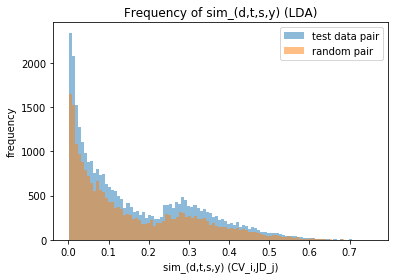

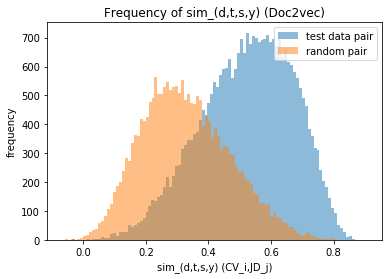

In [377]:
plot_2hist(test_lda_skills_cos_sims,rnd_lda_skills_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y) (CV_i,JD_j)','LDA')
plot_2hist(test_doc2vec_skills_cos_sims,rnd_doc2vec_skills_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y) (CV_i,JD_j)','Doc2vec')

In [202]:
test_skills_years_list = get_testdata_scalar(avg_skills_years_dict)
rnd_skills_years_list = get_rnddata_scalar(avg_skills_years_dict,len(test_skills_years_list))

In [203]:
test_lda_skills_cos_sims

array([0.24738227, 0.        , 0.25199429, ..., 0.51921849, 0.3583778 ,
       0.        ])

In [204]:
np.sum([doc_w*test_lda_doc_cos_sims, jt_w*test_lda_jt_cos_sims, sk_w*(test_lda_skills_cos_sims)], axis=0)


NameError: name 'doc_w' is not defined

In [339]:
doc_w = 0.5
jt_w = 0.25
sk_w = 0.25
yr_w = 0.1
test_lda_docjt_cos_sims = np.sum([doc_w*test_lda_doc_cos_sims, jt_w*test_lda_jt_cos_sims, sk_w*(test_lda_skills_cos_sims+yr_w*test_skills_years_list)], axis=0)
rnd_lda_docjt_cos_sims = np.sum([doc_w*rnd_lda_doc_cos_sims, jt_w*rnd_lda_jt_cos_sims, sk_w*(rnd_lda_skills_cos_sims+yr_w*rnd_skills_years_list)], axis=0)
test_doc2vec_docjt_cos_sims = np.sum([doc_w*test_doc2vec_doc_cos_sims, jt_w*test_doc2vec_jt_cos_sims, sk_w*(test_doc2vec_skills_cos_sims+yr_w*test_skills_years_list)], axis=0)
rnd_doc2vec_docjt_cos_sims = np.sum([doc_w*rnd_doc2vec_doc_cos_sims, jt_w*rnd_doc2vec_jt_cos_sims, sk_w*(rnd_doc2vec_skills_cos_sims+yr_w*rnd_skills_years_list)], axis=0)
                                     

NameError: name 'test_lda_doc_cos_sims' is not defined

In [340]:
plot_2hist(test_lda_docjt_cos_sims,rnd_lda_docjt_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y)(CV_i,JD_j)','LDA')
plot_2hist(test_doc2vec_docjt_cos_sims,rnd_doc2vec_docjt_cos_sims,'sim_(d,t,s,y)','sim_(d,t,s,y)(CV_i,JD_j)','Doc2vec')


NameError: name 'plot_2hist' is not defined

In [ ]:
test_lda_docjt_cos_sims

In [ ]:
doc_w = 0.5
jt_w = 0.25
sk_w = 0.25
yr_w = 0.05
test_lda_docjt_eu_dists = np.sum([doc_w*test_lda_doc_eu_dists, jt_w*test_lda_jt_eu_dists, sk_w*test_lda_skills_eu_dists], axis=0)
rnd_lda_docjt_eu_dists = np.sum([doc_w*rnd_lda_doc_eu_dists, jt_w*rnd_lda_jt_eu_dists, sk_w*rnd_lda_skills_eu_dists], axis=0)
test_doc2vec_docjt_eu_dists = np.sum([doc_w*test_doc2vec_doc_eu_dists, jt_w*test_doc2vec_jt_eu_dists, sk_w*test_doc2vec_skills_eu_dists], axis=0)
rnd_doc2vec_docjt_eu_dists = np.sum([doc_w*rnd_doc2vec_doc_eu_dists, jt_w*rnd_doc2vec_jt_eu_dists, sk_w*rnd_doc2vec_skills_eu_dists], axis=0)


In [55]:
plot_2hist(test_lda_docjt_eu_dists,rnd_lda_docjt_eu_dists,'sim_(d,t,s)','sim_(d,t,s) (euclidean distance)','LDA')
plot_2hist(test_doc2vec_docjt_eu_dists,rnd_doc2vec_docjt_eu_dists,'sim_(d,t,s)','sim_(d,t,s) (euclidean distance)','Doc2vec')


NameError: name 'test_lda_docjt_eu_dists' is not defined

In [ ]:
cnt_o = 0
for idx,cs in enumerate(test_lda_docjt_cos_sims):
    if cs >1.99:
        print (["cvX_" + idx2key[idx]])
        #print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict["cvX_" + idx2key[idx]][3])
        #print ("---------------------------------------\n")
        #print (shuf_del_tok_rmcm_bi_stp_traintest_cvjd_dict["cvY_" + idx2key[idx]][3])
        #print ("---------------------------------------------------------------------------------------------\n\n\n")
        if cnt_o > 10:
            break
        cnt_o += 1

In [ ]:
print (lda_doc_vecs_dict['cvX_0'])
print (lda_doc_vecs_dict['cvY_0'])